**Importing frequently used libraries**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# **Read the data from Input CSV file**

In [2]:
loan_df = pd.read_csv('./loan.csv')

In [3]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# **Data Summary**

**Checking for headers and footers / summary**

In [ ]:
print(loan_df.shape)
print(loan_df.tail(),loan_df.head())


(39717, 111)
          id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
39712  92187      92174       2500         2500           1075.0   36 months   
39713  90665      90607       8500         8500            875.0   36 months   
39714  90395      90390       5000         5000           1325.0   36 months   
39715  90376      89243       5000         5000            650.0   36 months   
39716  87023      86999       7500         7500            800.0   36 months   

      int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
39712    8.07%        78.42     A        A4  ...                NaN   
39713   10.28%       275.38     C        C1  ...                NaN   
39714    8.07%       156.84     A        A4  ...                NaN   
39715    7.43%       155.38     A        A2  ...                NaN   
39716   13.75%       255.43     E        E2  ...                NaN   

      num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
39712             

Conclusion : No header / footer / summary as all dimension are 5*21

**Checking for NULL columns, if any**

In [ ]:
loan_df.shape

(39717, 111)

In [ ]:
loan_df.isnull().sum()
print('Total number of columns with null/na values', len(loan_df.columns[loan_df.isnull().all()].to_list()))

Total number of columns with null/na values 54


**Removing NULL columns**

In [ ]:
loan_df.dropna(axis=1,how='all',inplace=True)
loan_df.isnull().sum().sort_values(ascending=False)

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12942
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
home_ownership                    0
int_rate                          0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
term                              0
last_pymnt_amnt                   0
initial_list_status               0
funded_amnt_inv             

In [ ]:
loan_df.shape

(39717, 57)

In [ ]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [ ]:
print('Total number of columns after dropping na/null', len(loan_df.columns))

Total number of columns after dropping na/null 57


**Checking for unique distinct values**

In [ ]:
loan_df.pymnt_plan.describe()

count     39717
unique        1
top           n
freq      39717
Name: pymnt_plan, dtype: object

The column pymnt_plan has just one value unique which does not give any impact on the loan status.So we can drop it. Let's check if there are any more single valued columns.

In [ ]:
loan_df.nunique().sort_values().head(20)

tax_liens                      1
delinq_amnt                    1
chargeoff_within_12_mths       1
acc_now_delinq                 1
application_type               1
policy_code                    1
collections_12_mths_ex_med     1
pymnt_plan                     1
initial_list_status            1
term                           2
next_pymnt_d                   2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
dtype: int64

**Remove Columns containing only one Distinct value**

In [ ]:
single_valued_cols=['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','application_type','policy_code',
                    'collections_12_mths_ex_med','pymnt_plan','initial_list_status']
len(single_valued_cols)

9

In [ ]:
loan_df.drop(single_valued_cols,axis=1,inplace=True)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [ ]:
loan_df.nunique().sort_values(ascending=False).head(30)

id                         39717
url                        39717
member_id                  39717
total_pymnt                37850
total_pymnt_inv            37518
total_rec_int              35148
last_pymnt_amnt            34930
emp_title                  28820
desc                       26526
revol_bal                  21711
title                      19615
installment                15383
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
out_prncp                   1137
revol_util                  1089
funded_amnt                 1041
loan_amnt                    885
zip_code                     823
earliest_cr_line             526
int_rate                     371
mths_since_last_record       111
last_credit_pull_d           106
last_pymnt_d                 101
dtype: int

In [ ]:
loan_df.title.unique()

array(['Computer', 'bike', 'real estate business', ...,
       'Retiring credit card debt', 'MBA Loan Consolidation', 'JAL Loan'],
      dtype=object)

In [ ]:
loan_df.emp_title.unique()

array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'FiSite Research',
       'Squarewave Solutions, Ltd.', 'Evergreen Center'], dtype=object)

**Some Observations on Columns and Unique column values**

* **Unique Identifiers**: Columns "id", "url", and "member_id" are all unique throughout the data. Since any of them can serve as the primary key, we can choose to keep only one ("id" in this case) and drop the redundant columns ("url" and "member_id").
* **Uninformative Job Titles**: Columns "emp_title" and "title" contain mostly unique values, but they represent job titles which likely don't significantly influence loan default analysis. Therefore, dropping these columns is acceptable.
* **Limited Impact Features**: "zip_code" might not provide substantial insights into loan default risk. We can consider dropping it as well.
* **Irrelevant Post-Approval Data**: Since our goal is to identify risky applicants before loan approval, features generated after loan approval (e.g., "next_pymnt_d") are not relevant for this analysis.
* Further, columns related to customer's **demographic information** and loan attributes only are useful for this analysis. Columns - 'desc', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'next_pymnt_d', 'pub_rec_bankruptcies' are not useful for this purpose. Hence, droppping all these columns.

In [ ]:
cols_to_drop=['title','emp_title','url','member_id','zip_code','collection_recovery_fee','total_pymnt',
              'total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp','recoveries',
              'out_prncp','out_prncp_inv','last_credit_pull_d','last_pymnt_amnt','last_pymnt_d','desc','delinq_2yrs',
              'earliest_cr_line','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','open_acc',
              'pub_rec','revol_bal','revol_util','total_acc','next_pymnt_d','pub_rec_bankruptcies']
len(cols_to_drop)

30

In [ ]:
loan_df.drop(cols_to_drop,axis=1,inplace=True)

In [ ]:
loan_df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti'],
      dtype='object')

In [ ]:
loan_df.shape

(39717, 18)

## **Data Preparation - imputing/cleaning**

In [ ]:
#cleaning the term column to get a int value
loan_df.term=loan_df.term.apply(lambda x:x.replace(' months', ''))
loan_df.int_rate=loan_df.int_rate.apply(lambda x:x.replace('%', ''))

In [ ]:
loan_df.int_rate=loan_df.int_rate.astype('float64')
loan_df.int_rate.dtypes


dtype('float64')

In [ ]:
loan_df.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [ ]:
#Since Loan_status = 'Current' are people who are still paying loan, we cannot draw conclusive result; hence dropping the rows.*/
loan_df = loan_df[~(loan_df['loan_status'] == 'Current')]

In [ ]:
loan_df.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

In [ ]:
# Cleaning the data to get only int values
loan_df.emp_length.value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [ ]:
loan_df = loan_df.dropna(subset=['emp_length'])
loan_df.emp_length = loan_df.emp_length.str.replace('years','')
loan_df.emp_length = loan_df.emp_length.str.replace('year','')
loan_df.emp_length = loan_df.emp_length.str.replace('+','')
loan_df.emp_length = loan_df.emp_length.str.replace('< ','')
loan_df.emp_length= loan_df.emp_length.astype('int64')

In [ ]:
loan_df.emp_length.unique()

array([10,  1,  3,  8,  9,  4,  5,  6,  2,  7])

In [ ]:
# There is only one row with home ownership as 'None' not adding to any category, let's drop it
loan_df= loan_df[loan_df.home_ownership!='NONE']

### **Studying the filtered data for getting insights**
#### This involves -
 * checking NULL value percentage,
 * observing number of unique values and for columns having upto 15-30 unique values, checking value counts,
 * for columns which may help in analysis and having more number of unique values, checking description of the column with describe() function, and
 * exploring the opportunity to derive additional columns

In [ ]:
loan_df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti'],
      dtype='object')

In [ ]:
round(100*loan_df.isnull().sum()/len(loan_df.index),2)

id                     0.0
loan_amnt              0.0
funded_amnt            0.0
funded_amnt_inv        0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
emp_length             0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
purpose                0.0
addr_state             0.0
dti                    0.0
dtype: float64

In [ ]:
loan_df.term.value_counts()

term
 36    28284
 60     9257
Name: count, dtype: int64

In [ ]:
loan_df.grade.value_counts()

grade
B    11357
A     9659
C     7669
D     4979
E     2620
F      959
G      298
Name: count, dtype: int64

In [ ]:
loan_df.sub_grade.value_counts()

sub_grade
A4    2792
B3    2746
A5    2634
B5    2559
B4    2387
C1    2014
B2    1944
C2    1899
A3    1740
B1    1721
C3    1458
A2    1441
D2    1255
C4    1176
C5    1122
D3    1090
A1    1052
D1     916
D4     905
D5     813
E1     711
E2     605
E3     504
E4     419
E5     381
F1     301
F2     228
F3     172
F4     148
F5     110
G1      93
G2      77
G4      54
G3      45
G5      29
Name: count, dtype: int64

In [ ]:
loan_df.emp_length.value_counts()

emp_length
10    8488
1     7675
2     4291
3     4012
4     3342
5     3193
6     2168
7     1711
8     1435
9     1226
Name: count, dtype: int64

In [ ]:
loan_df.home_ownership.value_counts()

home_ownership
RENT        18078
MORTGAGE    16595
OWN          2770
OTHER          98
Name: count, dtype: int64

In [ ]:
loan_df.annual_inc.nunique()

5006

In [ ]:
loan_df.verification_status.value_counts()

verification_status
Not Verified       16275
Verified           11772
Source Verified     9494
Name: count, dtype: int64

In [ ]:
loan_df.issue_d.value_counts()

issue_d
Dec-11    1994
Nov-11    1971
Oct-11    1863
Sep-11    1837
Aug-11    1751
Jun-11    1675
Jul-11    1674
May-11    1554
Apr-11    1505
Mar-11    1402
Jan-11    1336
Feb-11    1239
Dec-10    1220
Nov-10    1096
Jul-10    1092
Oct-10    1086
Sep-10    1058
Aug-10    1058
Jun-10     996
May-10     894
Apr-10     806
Mar-10     718
Feb-10     605
Nov-09     602
Dec-09     598
Jan-10     585
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     170
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Sep-08      32
Aug-07      31
Jul-07      30
Sep-07      18
Jun-07       1
Name: count, dtype: int64

*Above information shows that this column can be used to add derived columns - 'issue_d_year' and 'issue_d_month'. This will be done after observing the value_counts() or describe() of all the columns.*

In [ ]:
loan_df.loan_status.value_counts()

loan_status
Fully Paid     32142
Charged Off     5399
Name: count, dtype: int64

In [ ]:
loan_df.purpose.value_counts()

purpose
debt_consolidation    17674
credit_card            4899
other                  3711
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: count, dtype: int64

In [ ]:
loan_df.addr_state.value_counts()

addr_state
CA    6767
NY    3599
FL    2694
TX    2605
NJ    1768
IL    1442
PA    1437
VA    1339
GA    1319
MA    1267
OH    1146
MD    1005
AZ     806
WA     783
CO     744
NC     726
CT     707
MI     671
MO     647
MN     583
NV     464
SC     451
WI     426
OR     421
AL     418
LA     417
KY     307
OK     282
UT     247
KS     244
AR     227
DC     211
RI     192
NM     179
WV     164
HI     162
NH     157
DE     110
MT      77
AK      76
WY      76
SD      61
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: count, dtype: int64

In [ ]:
loan_df.dti.describe()

count    37541.000000
mean        13.284309
std          6.660676
min          0.000000
25%          8.160000
50%         13.380000
75%         18.550000
max         29.990000
Name: dti, dtype: float64

#### **Derived Metrics - issue_d_month, issue_d_year, loan_status_indic**

In [ ]:
loan_df[['issue_d_month', 'issue_d_year']] = loan_df.issue_d.str.split('-',expand=True)
loan_df.loc[loan_df['loan_status'] == 'Charged Off','loan_status_indic'] = 0
loan_df.loc[loan_df['loan_status'] == 'Fully Paid','loan_status_indic'] = 1

In [ ]:
loan_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,issue_d_month,issue_d_year,loan_status_indic
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10,...,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,Dec,11,1.0
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,1,...,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,Dec,11,0.0
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,10,...,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,Dec,11,1.0
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,10,...,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,Dec,11,1.0
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,A4,3,...,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,Dec,11,1.0


In [ ]:
loan_df.dtypes

id                       int64
loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_length               int64
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
addr_state              object
dti                    float64
issue_d_month           object
issue_d_year            object
loan_status_indic      float64
dtype: object

# **Univariate Analysis First level**


*   Frequency plots for numerical columns
*   Listing Observations based on the plots
*   Analyzing Categorical columns
*   Outliers Identification and treatement





In [ ]:
#creating a list of numerical columns for univariate analysis
univariate_variables = ['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate',
                        'installment','annual_inc','dti','emp_length']

In [ ]:
# Column metadata used by functions below
column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annual Income',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'issue_y': 'Issue Year',
    'issue_m': 'Issue Month',
    'issue_q': 'Issue Quarter',
    'loan_amnt_b': 'Loan Amount Bins',
    'funded_amnt_inv_b': 'Investor Funded Bins',
    'funded_amnt_b': 'Funded Amount Bins',
    'annual_inc_b': 'Annual Income Bins',
    'int_rate_b': 'Interest Rate Bins',
    'dti_b': 'DTI Bins'
}

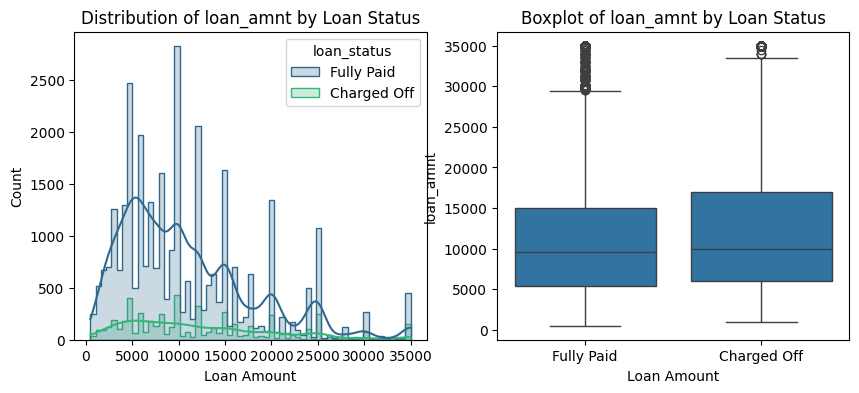

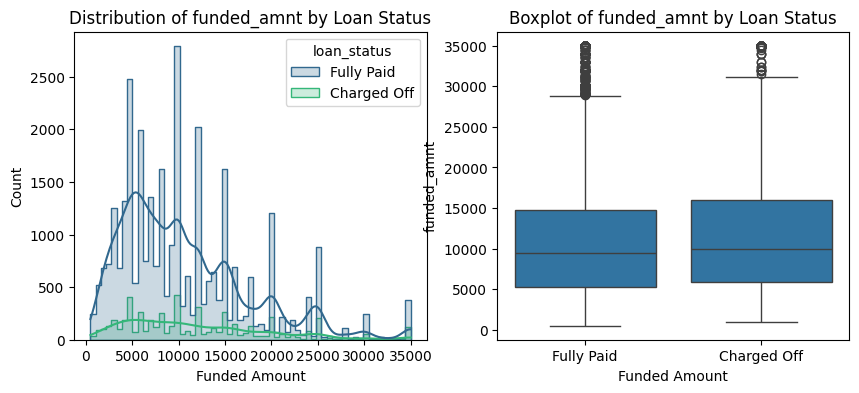

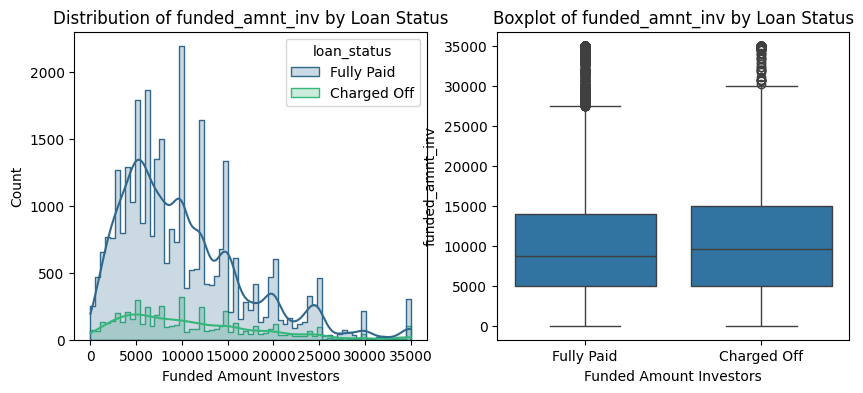

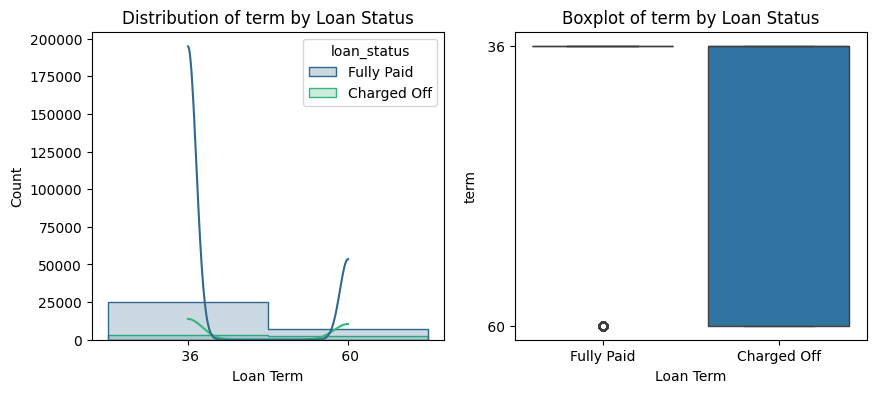

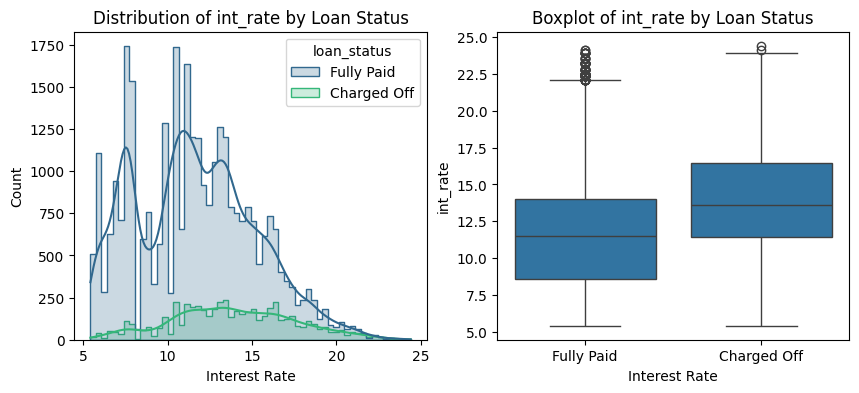

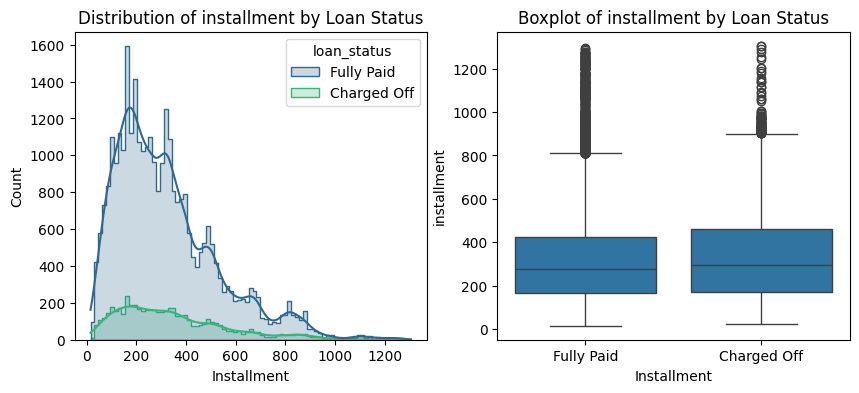

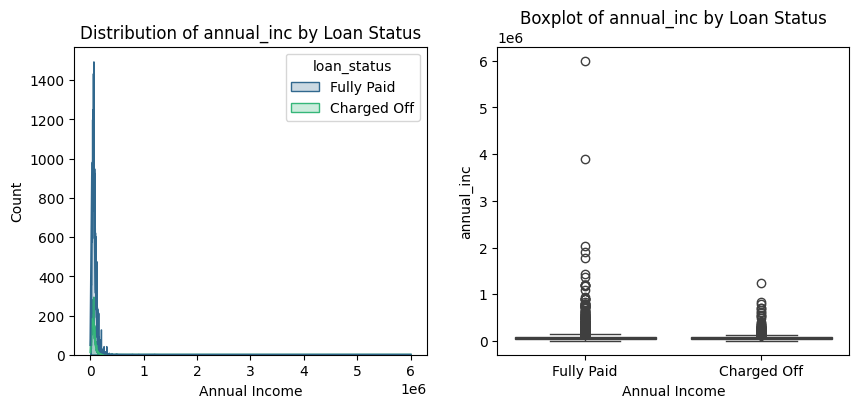

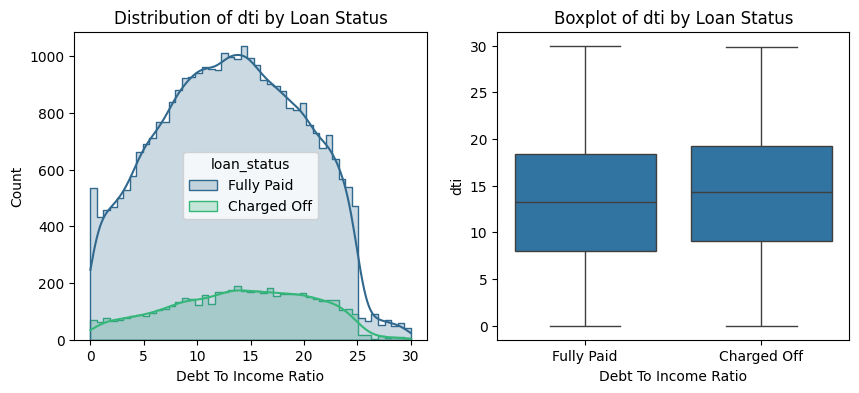

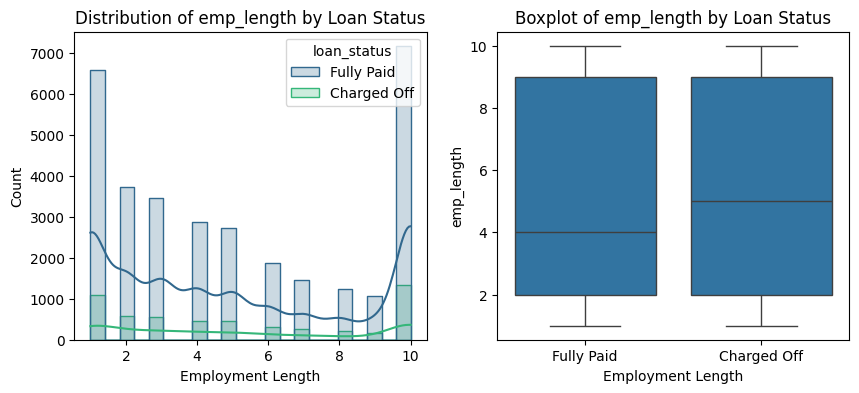

In [ ]:
# Iterate through each numerical variable
for variable in univariate_variables:
    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))

    # Subplot 1: Distribution plot
    sns.histplot(data=loan_df, x=variable, hue="loan_status", palette="viridis", kde=True, element="step", ax=axs[0])
    axs[0].set_title(f"Distribution of {variable} by Loan Status")
    axs[0].set_xlabel(column_titles[variable])

    # Subplot 2: Boxplot
    sns.boxplot(data=loan_df, x="loan_status", y=variable, ax=axs[1])
    axs[1].set_title(f"Boxplot of {variable} by Loan Status")
    axs[1].set_xlabel(column_titles[variable])

    # Show the plot
    plt.show()



**Utility Functions for Outlier and Plotting**

### **Base Oberservations**

1. loan_amnt: Most loans are in the range of 5,000 to 15,000.

2. funded_amnt: Similar distribution to loan_amnt.

3. funded_amnt_inv: Also similar distribution.

4. term: Most loans are either 36 or 60 months.

5. int_rate: Most loans have interest rates between 10% and 15%.
6. installment: Most installments are between 200 and 400.
7. annual_inc: Most borrowers have annual incomes between 40,000 and 80,000.
8. dti: Most borrowers have debt-to-income ratios between 10% and 20%.
9. emp_length: Most borrowers have been employed for 10 years or less.




### **Observations based on Univariate Analysis so far:**

1.   Higher loan amount / funded amount might be linked to increased charge-offs.
2.   Loans with 60-month terms seem to have higher charge-off rates.
3.   A positive correlation between higher interest rates and charge-offs is possible.
4.   Higher installments could contribute to loan charge-offs.
5.   Annual income data likely has significant outliers. Data cleaning might be needed.

# Outliers cleaning


In [ ]:
# Utility function to plot diagram for different analysis
def plot_diagram(df, column):
    fig, p = plt.subplots(1,2, figsize=(16, 4))
    sns.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sns.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    plt.tight_layout()
    plt.show()

**Analysis for Loan Amount**

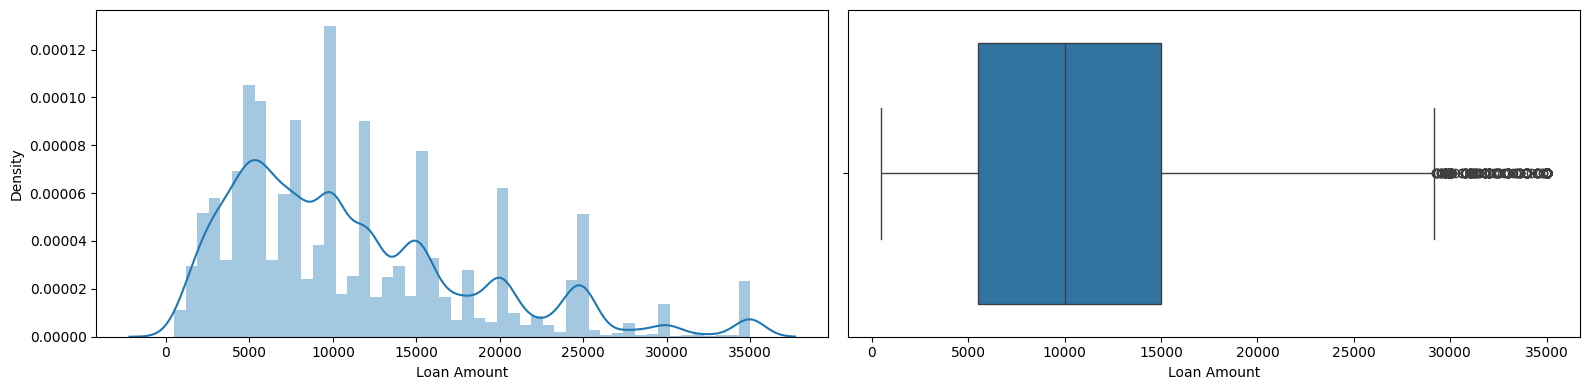

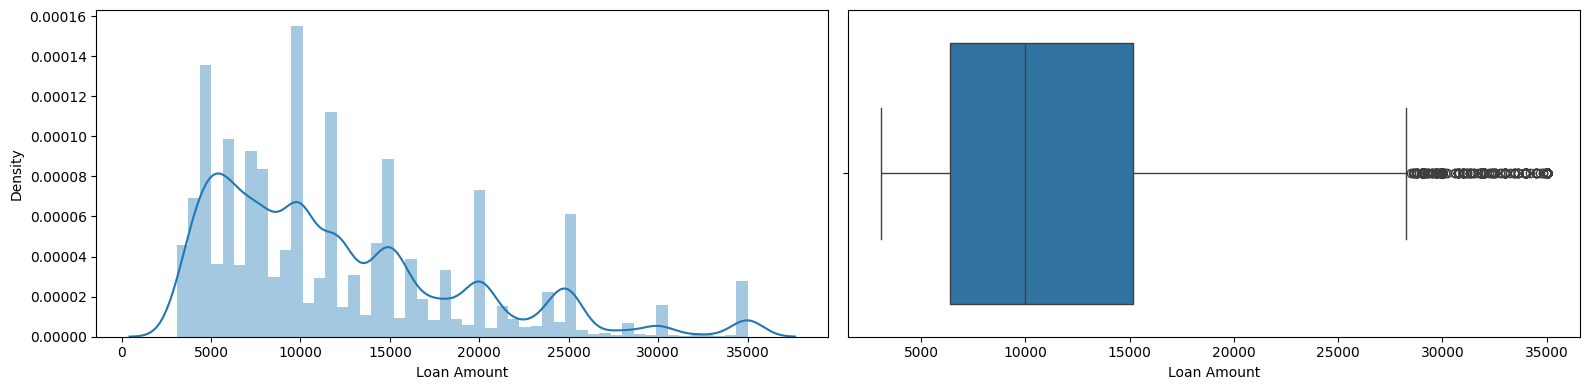

count    33902.000000
mean     12073.948440
std       7102.762793
min       3100.000000
25%       6400.000000
50%      10000.000000
75%      15168.750000
max      35000.000000
Name: loan_amnt, dtype: float64

In [ ]:
plot_diagram(loan_df ,'loan_amnt')
loan_df['loan_amnt'].describe()
loan_df.loan_amnt.quantile([0.1,.2,.3,.4,.5,0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])
filtered_loan_df = loan_df[ (loan_df['loan_amnt'] >= 3090) & (loan_df['loan_amnt'] <= 35000)]
filtered_loan_df['loan_amnt'].describe()
plot_diagram(filtered_loan_df ,'loan_amnt')
filtered_loan_df['loan_amnt'].describe()


**Analysis of annual_income**

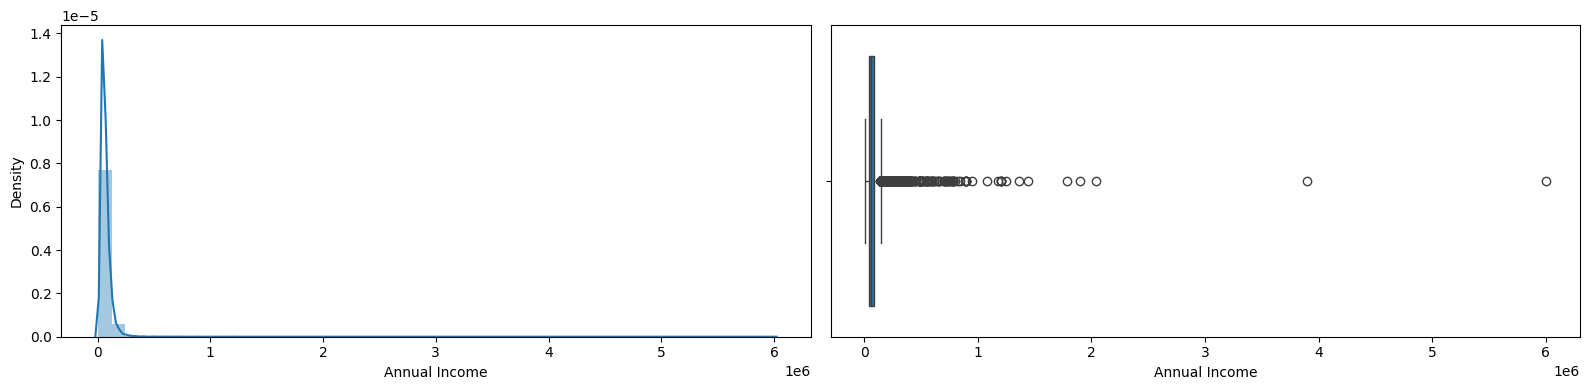

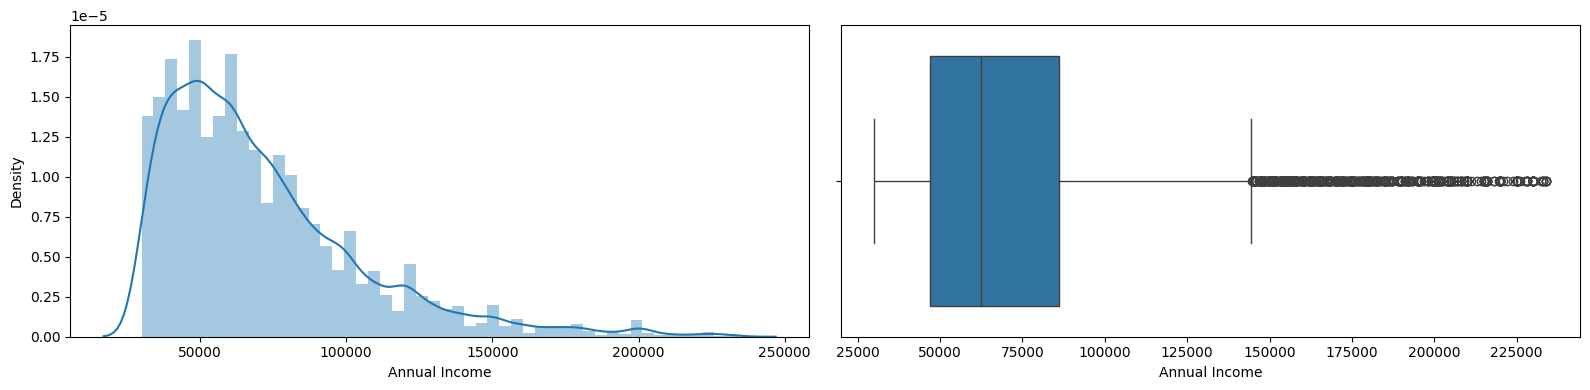

count     31069.000000
mean      71408.447350
std       34212.364831
min       30000.000000
25%       47000.000000
50%       62496.000000
75%       86000.000000
max      234000.000000
Name: annual_inc, dtype: float64

In [ ]:
plot_diagram(loan_df ,'annual_inc')
loan_df['annual_inc'].describe()
loan_df.annual_inc.quantile([0.1,.2,.3,.4,.5,0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])
#Range of data is from 30000 to 234144 .
filtered_loan_df = filtered_loan_df[ (filtered_loan_df['annual_inc'] >= 30000) & (filtered_loan_df['annual_inc'] <= 234144)]
filtered_loan_df['annual_inc'].describe()
plot_diagram(filtered_loan_df ,'annual_inc')
filtered_loan_df['annual_inc'].describe()

**Analysis of funded_amount**

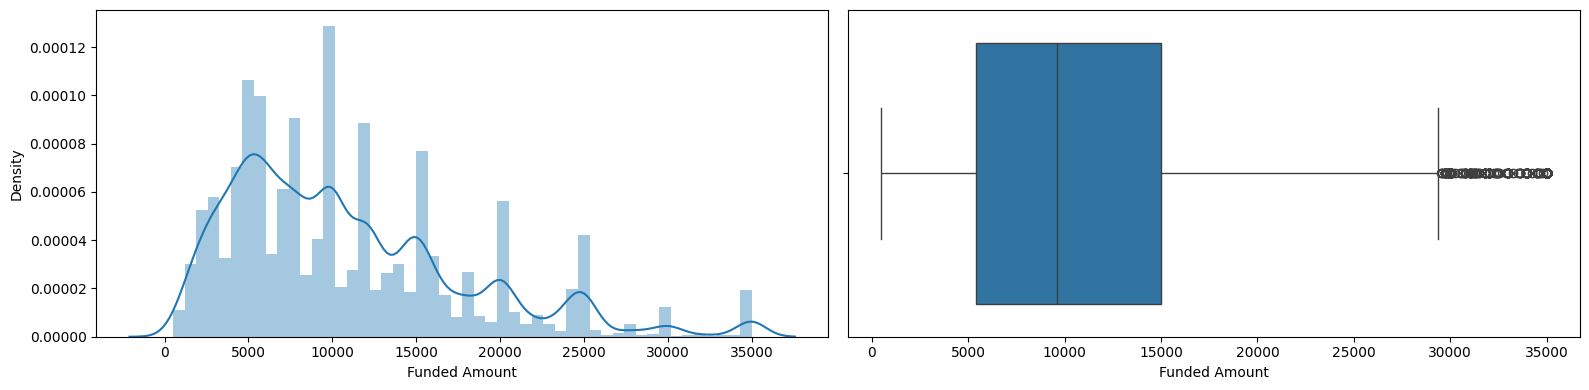

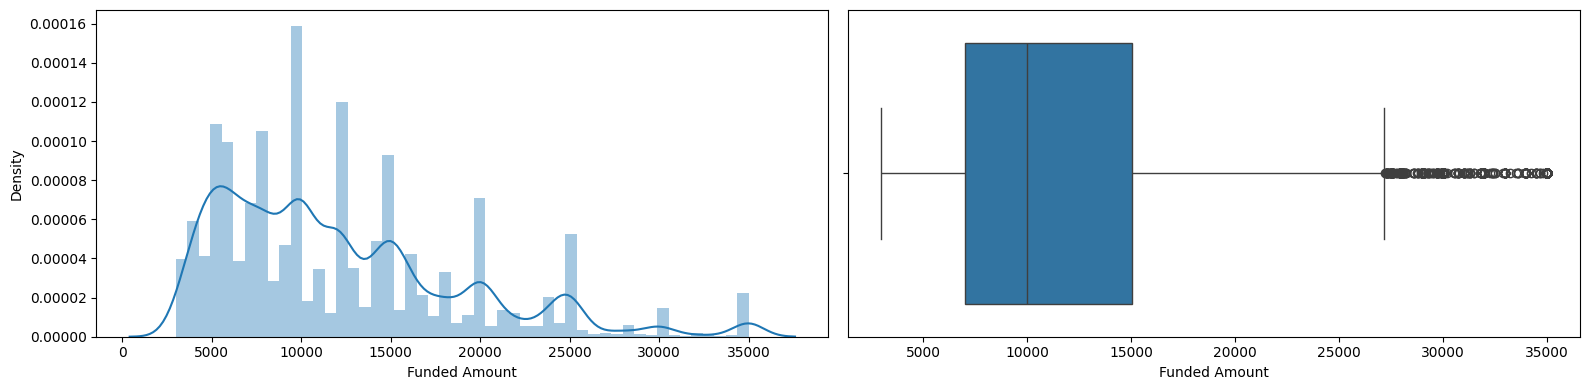

count    31046.000000
mean     12105.635186
std       6822.356600
min       3000.000000
25%       7000.000000
50%      10000.000000
75%      15075.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [ ]:
plot_diagram(loan_df ,'funded_amnt')
loan_df['funded_amnt'].describe()
loan_df.funded_amnt.quantile([0.1,.2,.3,.4,.5,0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])
#Range of data is from 3000 to 35000 .
filtered_loan_df = filtered_loan_df[ (filtered_loan_df['funded_amnt'] >= 3000) & (filtered_loan_df['funded_amnt'] <= 35000)]
plot_diagram(filtered_loan_df ,'funded_amnt')
filtered_loan_df['funded_amnt'].describe()

***Analysis for interest rate***

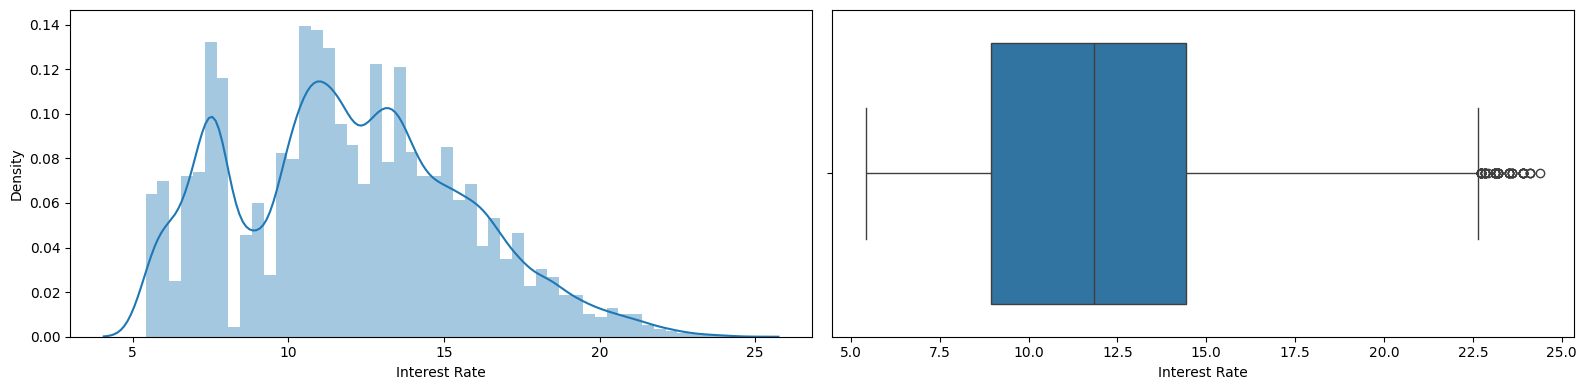

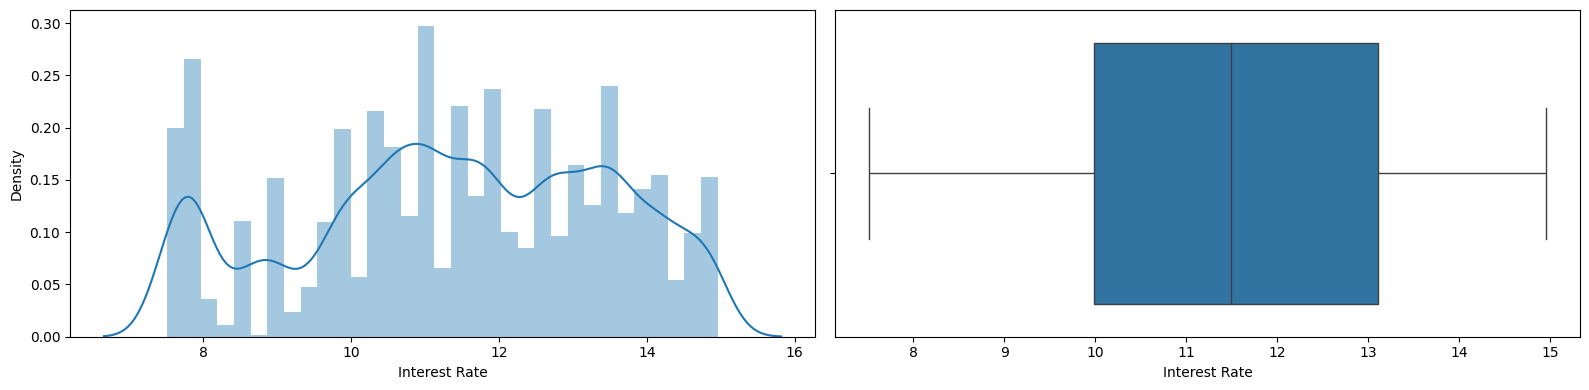

count    20106.000000
mean        11.398131
std          2.073535
min          7.510000
25%          9.990000
50%         11.490000
75%         13.110000
max         14.960000
Name: int_rate, dtype: float64

In [ ]:
plot_diagram(loan_df ,'int_rate')
loan_df['int_rate'].describe()
loan_df.int_rate.quantile([0.1,.2,.3,.4,.5,0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])
#Range of data is from 3000 to 35000 .
filtered_loan_df = filtered_loan_df[ (filtered_loan_df['int_rate'] >= 7.5) & (filtered_loan_df['int_rate'] <= 15)]
filtered_loan_df['int_rate'].describe()
plot_diagram(filtered_loan_df ,'int_rate')
filtered_loan_df['int_rate'].describe()


**Analysis for DTI**

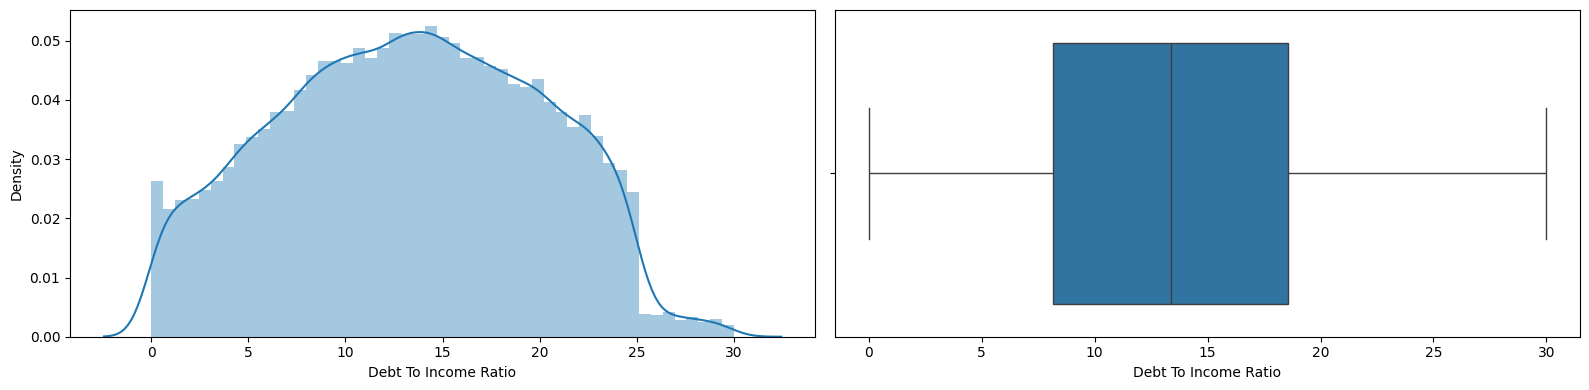

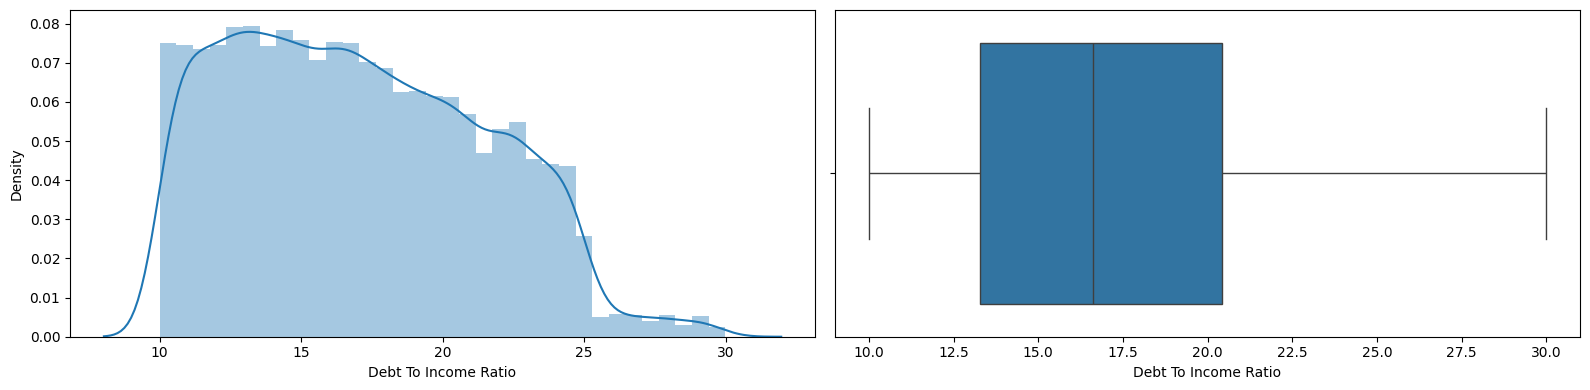

count    13603.000000
mean        17.021087
std          4.412456
min         10.000000
25%         13.290000
50%         16.620000
75%         20.420000
max         29.990000
Name: dti, dtype: float64

In [ ]:
plot_diagram(loan_df ,'dti')
loan_df['dti'].describe()
loan_df.dti.quantile([0.1,.2,.3,.4,.5,0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])
#Range of data is from 3000 to 35000 .
filtered_loan_df = filtered_loan_df[ (filtered_loan_df['dti'] >= 10) & (filtered_loan_df['dti'] <= 30)]
filtered_loan_df['dti'].describe()
plot_diagram(filtered_loan_df ,'dti')
filtered_loan_df['dti'].describe()



**Univariate analysis post removal of outliers**

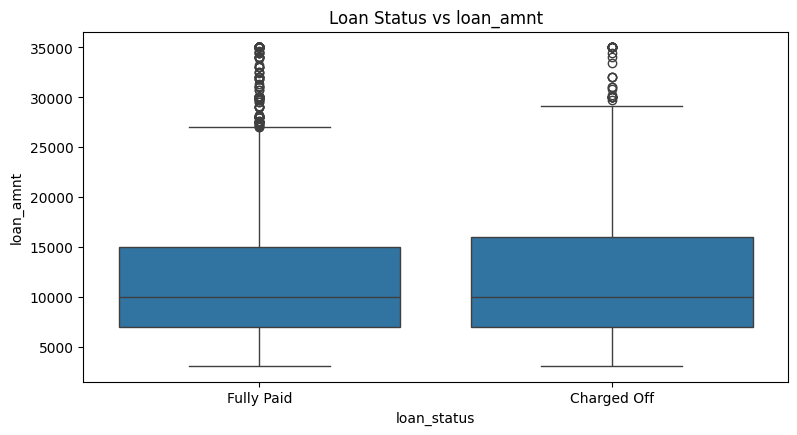

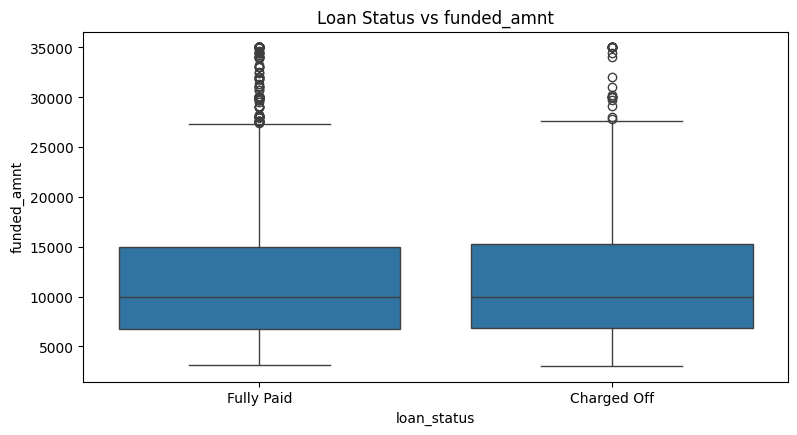

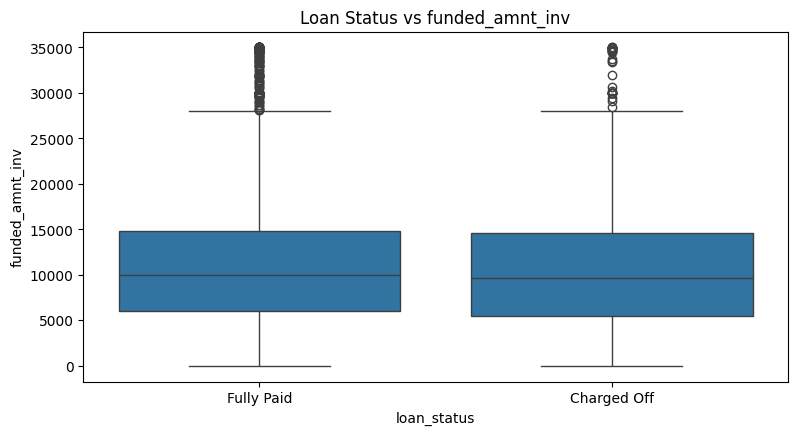

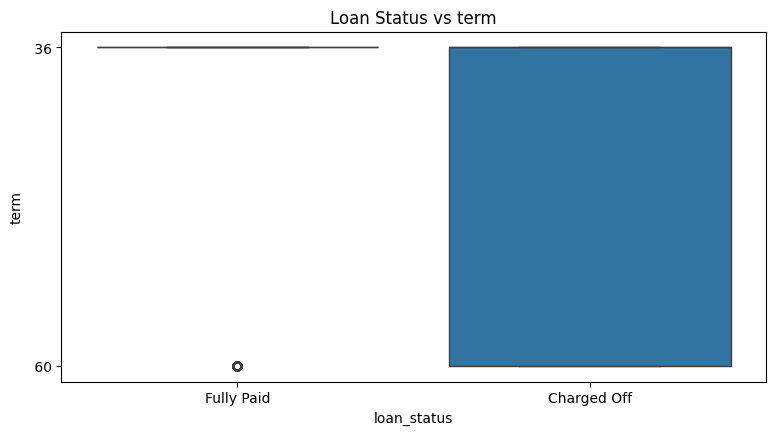

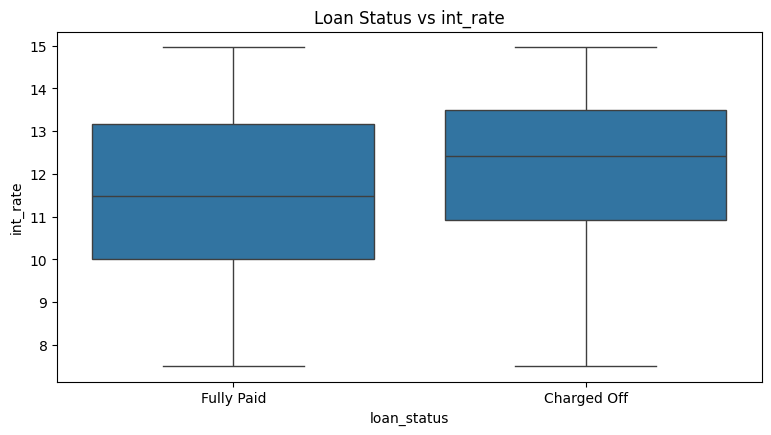

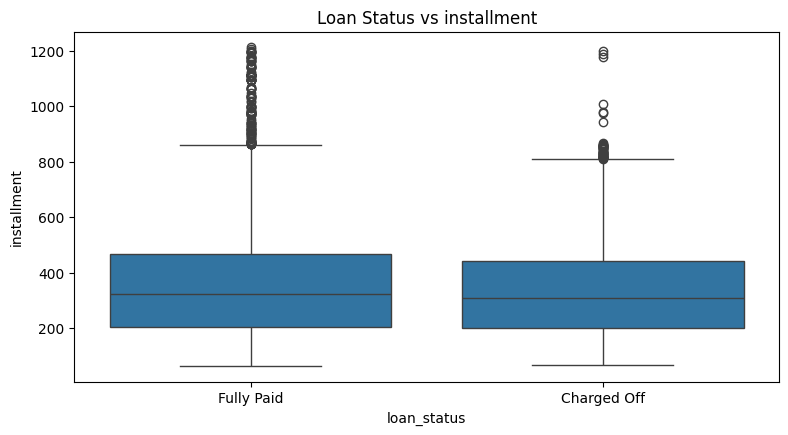

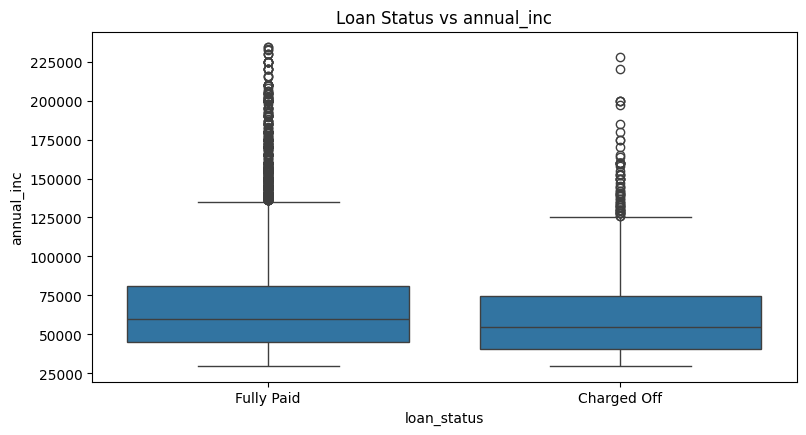

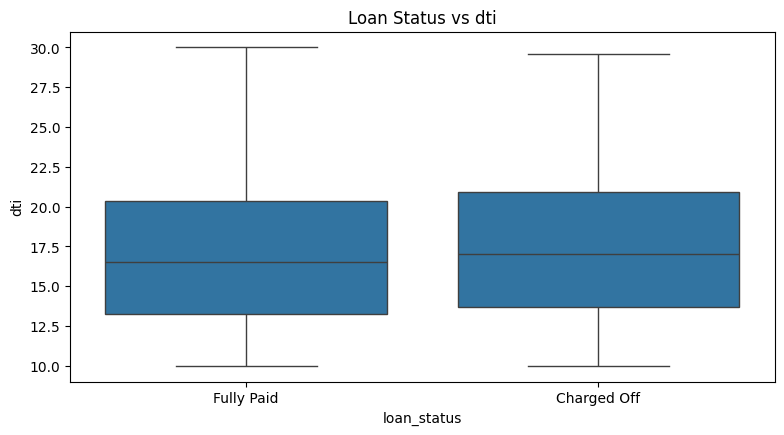

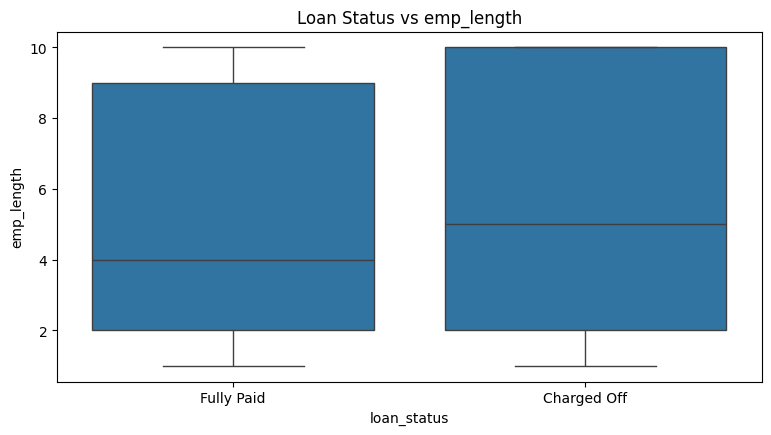

In [ ]:
for column in univariate_variables:
  plt.figure(figsize=(20, 10))
  plt.subplot(2,2,1)
  sns.boxplot(x = 'loan_status', y = filtered_loan_df[column], data = loan_df)
  plt.title('Loan Status vs ' + column)
  plt.show()

**Categorical univariate analysis**


*   Analyze home_ownership
*   Analyze grade and subgrade
*   Analyze purpose



<Axes: xlabel='home_ownership'>

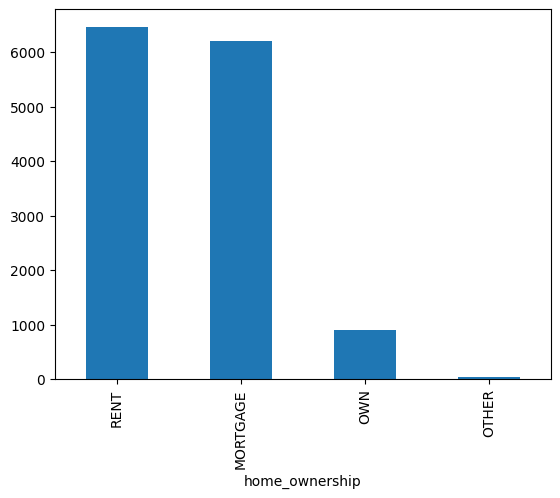

In [ ]:
filtered_loan_df['home_ownership'].value_counts().plot.bar()

<Axes: xlabel='grade', ylabel='count'>

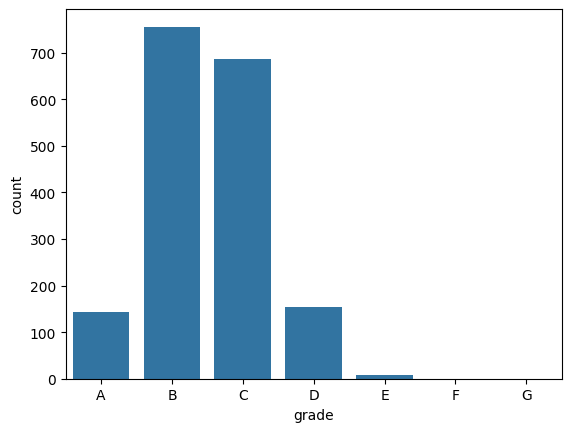

In [ ]:
sns.countplot(x = 'grade', data = filtered_loan_df[filtered_loan_df.loan_status == 'Charged Off'],
              order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

<Axes: xlabel='count', ylabel='purpose'>

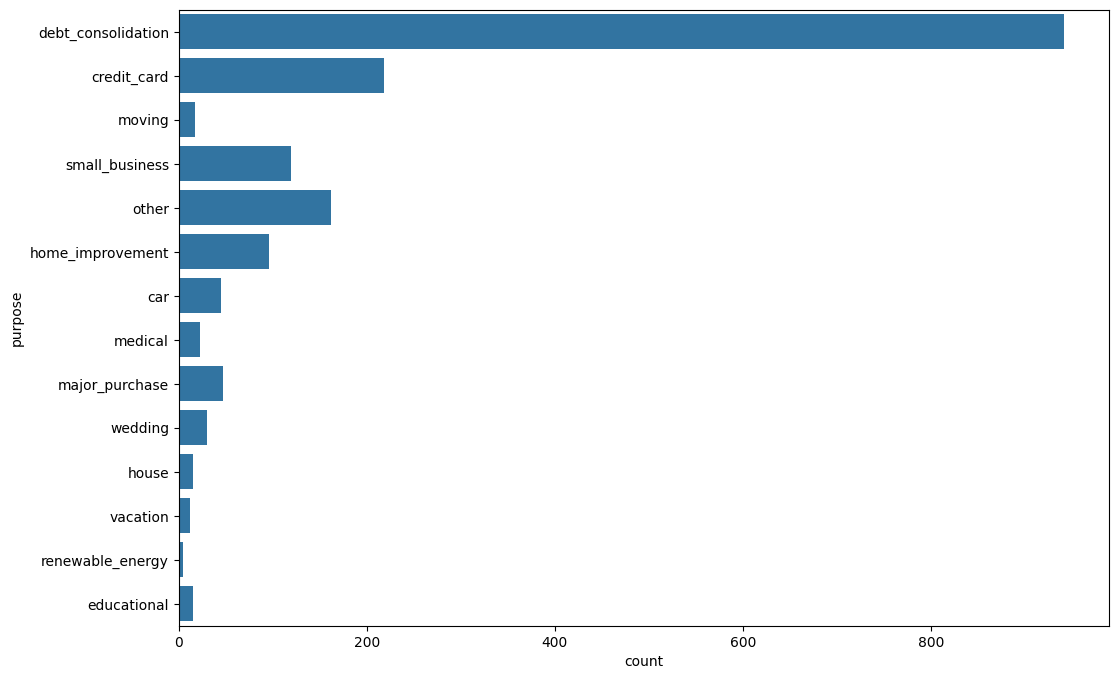

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
sns.countplot(y ='purpose', data=filtered_loan_df[filtered_loan_df.loan_status == 'Charged Off'])

<Axes: xlabel='count', ylabel='purpose'>

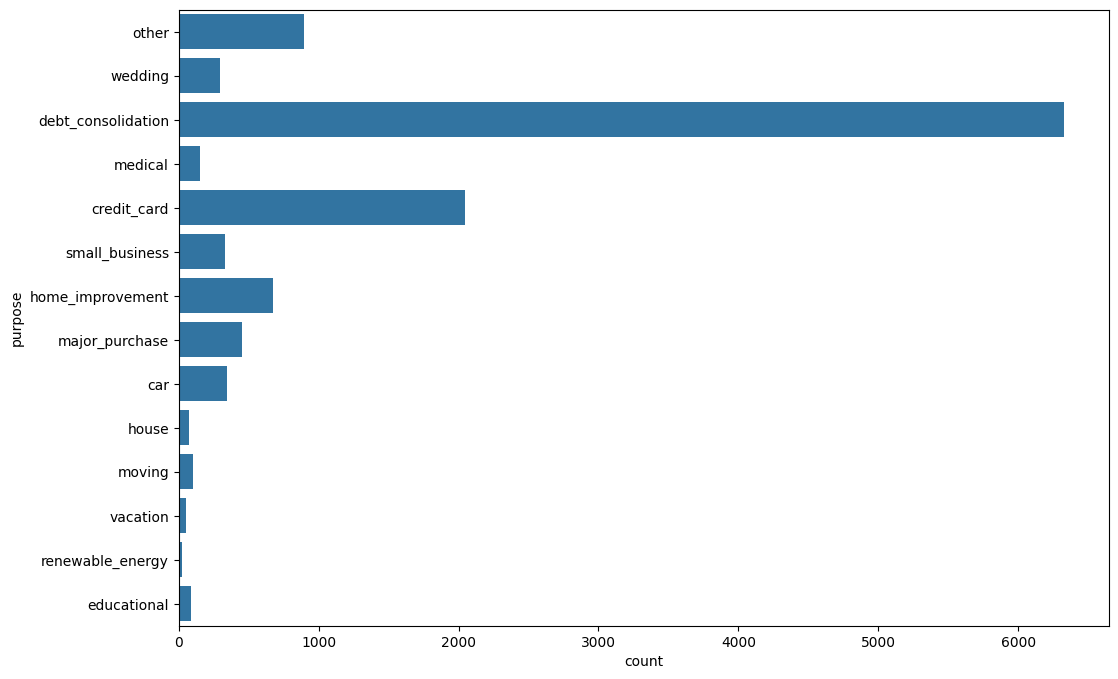

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
sns.countplot(y ='purpose', data=filtered_loan_df[filtered_loan_df.loan_status != 'Charged Off'])

**Extracting only subgrade (int level value) from the sub_grade column**

In [ ]:
filtered_loan_df.sub_grade = pd.to_numeric(filtered_loan_df.sub_grade.apply(lambda x : x[-1]))
filtered_loan_df.sub_grade.head()

3     1
5     4
10    3
11    5
12    1
Name: sub_grade, dtype: int64

Text(0.5, 1.0, 'Grade-Subgrade variation in data for Charged Off loan status')

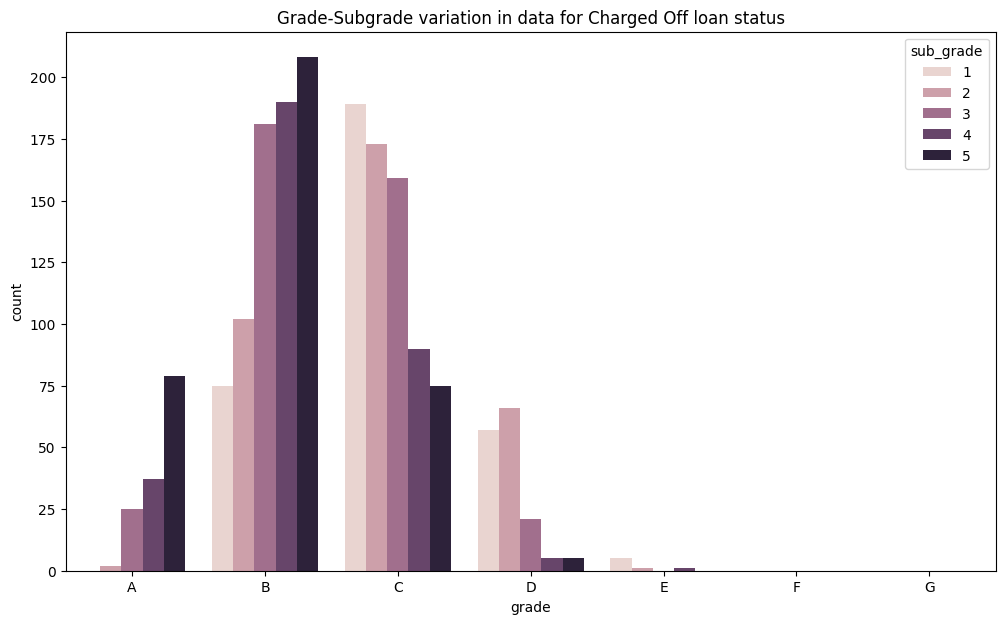

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] ,
              hue = 'sub_grade',data = filtered_loan_df[filtered_loan_df.loan_status == 'Charged Off']).set_title('Grade-Subgrade variation in data for Charged Off loan status')

Text(0.5, 1.0, 'Analysis on employment length')

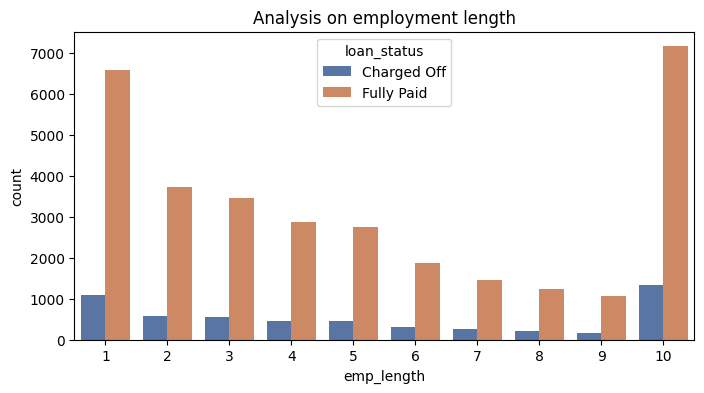

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(x = 'emp_length', hue = 'loan_status', data = loan_df, palette='deep')
plt.title('Analysis on employment length')

# Observations and conclusions

1. Purpose of loan amount is mostly for debt_consolidation in both cases
2. Home ownership in case of Rent/mortgage are more number of people who take loan
3. Grade B/C and Subgrade 5/1 respectively are mostly people who are defaulted
4. Lower annual_inc are mostly defaulters
5. Higher dti can be mostly defaulters
6. Higher in_rate can be mostly defulters




**Bucketing for interest Rate , annual Inc and dti**


In [ ]:
bins, bin_edges = pd.qcut(loan_df["int_rate"], q=5, precision=0, labels=None, retbins=True)

# Create unique bin labels with a counter
counter = 0
unique_bin_labels = []
for label in ['7.5-11.5', '11.5-14.0', '14.0-16.5', '16.5-19.0', '19.0-21.5']:
  unique_bin_labels.append(f"{label}_{counter}")  # Add counter to ensure uniqueness
  counter += 1  # Increment counter for subsequent labels

# Use categorical plotting with cut points and unique labels
filtered_loan_df['int_rate_b'] = pd.cut(filtered_loan_df["int_rate"], bins=bin_edges, labels=unique_bin_labels)
filtered_loan_df.groupby('int_rate_b')['loan_status'].value_counts()


int_rate_b   loan_status
7.5-11.5_0   Fully Paid     1194
             Charged Off      78
11.5-14.0_1  Fully Paid     3794
             Charged Off     416
14.0-16.5_2  Fully Paid     3299
             Charged Off     551
16.5-19.0_3  Fully Paid     3570
             Charged Off     701
19.0-21.5_4  Charged Off       0
             Fully Paid        0
Name: count, dtype: int64

In [ ]:
bins, bin_edges = pd.qcut(loan_df["annual_inc"], q=5, precision=0, labels=None, retbins=True)

# Create unique bin labels with a counter
counter = 0
unique_bin_labels = []
for label in ['3k-31k', '31k-58k', '58k-85k', '85k-112k', '112k-140k']:
  unique_bin_labels.append(f"{label}_{counter}")  # Add counter to ensure uniqueness
  counter += 1  # Increment counter for subsequent labels

# Use categorical plotting with cut points and unique labels
filtered_loan_df['annual_inc_b'] = pd.cut(filtered_loan_df["annual_inc"], bins=bin_edges, labels=unique_bin_labels)


In [ ]:
bins, bin_edges = pd.qcut(loan_df["dti"], q=5, precision=0, labels=None, retbins=True)

# Create unique bin labels with a counter
counter = 0
unique_bin_labels = []
for label in ['10-15', '15-20', '20-25', '25-30', '30-35']:
  unique_bin_labels.append(f"{label}_{counter}")  # Add counter to ensure uniqueness
  counter += 1  # Increment counter for subsequent labels

# Use categorical plotting with cut points and unique labels
filtered_loan_df['dti_b'] = pd.cut(filtered_loan_df["dti"], bins=bin_edges, labels=unique_bin_labels)


# **Bivariate Analysis**

In [ ]:
filtered_loan_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,loan_status,purpose,addr_state,dti,issue_d_month,issue_d_year,loan_status_indic,int_rate_b,annual_inc_b,dti_b
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,1,10,...,Fully Paid,other,CA,20.00,Dec,11,1.0,16.5-19.0_3,31k-58k_1,30-35_4
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,4,3,...,Fully Paid,wedding,AZ,11.20,Dec,11,1.0,7.5-11.5_0,3k-31k_0,15-20_1
10,1070078,6500,6500,6500.0,60,14.65,153.45,C,3,5,...,Fully Paid,debt_consolidation,AZ,16.12,Dec,11,1.0,16.5-19.0_3,85k-112k_3,25-30_3
11,1069908,12000,12000,12000.0,36,12.69,402.54,B,5,10,...,Fully Paid,debt_consolidation,CA,10.78,Dec,11,1.0,14.0-16.5_2,85k-112k_3,15-20_1
12,1064687,9000,9000,9000.0,36,13.49,305.38,C,1,1,...,Charged Off,debt_consolidation,VA,10.08,Dec,11,0.0,16.5-19.0_3,3k-31k_0,15-20_1


*As a general observation, annual income is the most driving factor for loan amnt. It would be good to calculate a derived metric - like there is dti i.e. debt to income ratio, let's have loan_amt/annual_inc ratio, and observe it's correlation with the loan_status*

In [ ]:
filtered_loan_df['ltai'] = round(filtered_loan_df['loan_amnt']/filtered_loan_df['annual_inc'],2)

In [ ]:
loan_corr_matrix=filtered_loan_df[bivariate_variables].corr()
round(loan_corr_matrix,2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,emp_length,loan_status_indic,ltai,ltai
loan_amnt,1.00,0.98,0.91,0.26,0.13,0.91,0.31,0.01,0.11,-0.01,0.68,0.68
funded_amnt,0.98,1.00,0.93,0.22,0.14,0.94,0.31,0.00,0.11,-0.00,0.66,0.66
funded_amnt_inv,0.91,0.93,1.00,0.25,0.11,0.86,0.28,0.02,0.13,0.03,0.62,0.62
term,0.26,0.22,0.25,1.00,0.18,-0.08,0.02,0.05,0.11,-0.12,0.23,0.23
int_rate,0.13,0.14,0.11,0.18,1.00,0.14,0.03,0.04,-0.01,-0.11,0.10,0.10
installment,0.91,0.94,0.86,-0.08,0.14,1.00,0.31,-0.01,0.08,0.03,0.59,0.59
annual_inc,0.31,0.31,0.28,0.02,0.03,0.31,1.00,-0.13,0.14,0.07,-0.38,-0.38
dti,0.01,0.00,0.02,0.05,0.04,-0.01,-0.13,1.00,0.04,-0.03,0.11,0.11
emp_length,0.11,0.11,0.13,0.11,-0.01,0.08,0.14,0.04,1.00,-0.02,0.01,0.01
loan_status_indic,-0.01,-0.00,0.03,-0.12,-0.11,0.03,0.07,-0.03,-0.02,1.00,-0.07,-0.07


In [ ]:
bivariate_variables.append('ltai')

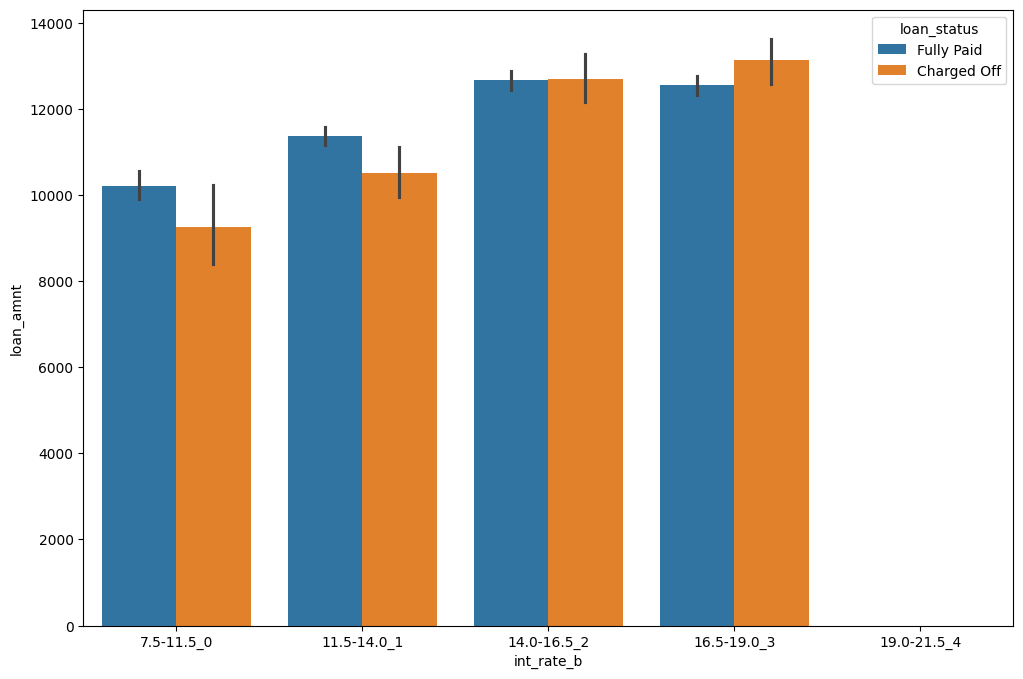

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(y="loan_amnt", x="int_rate_b", data=filtered_loan_df,hue="loan_status")
plt.show()
#Higher interest rate seems to be more charged off in case of high loan amount

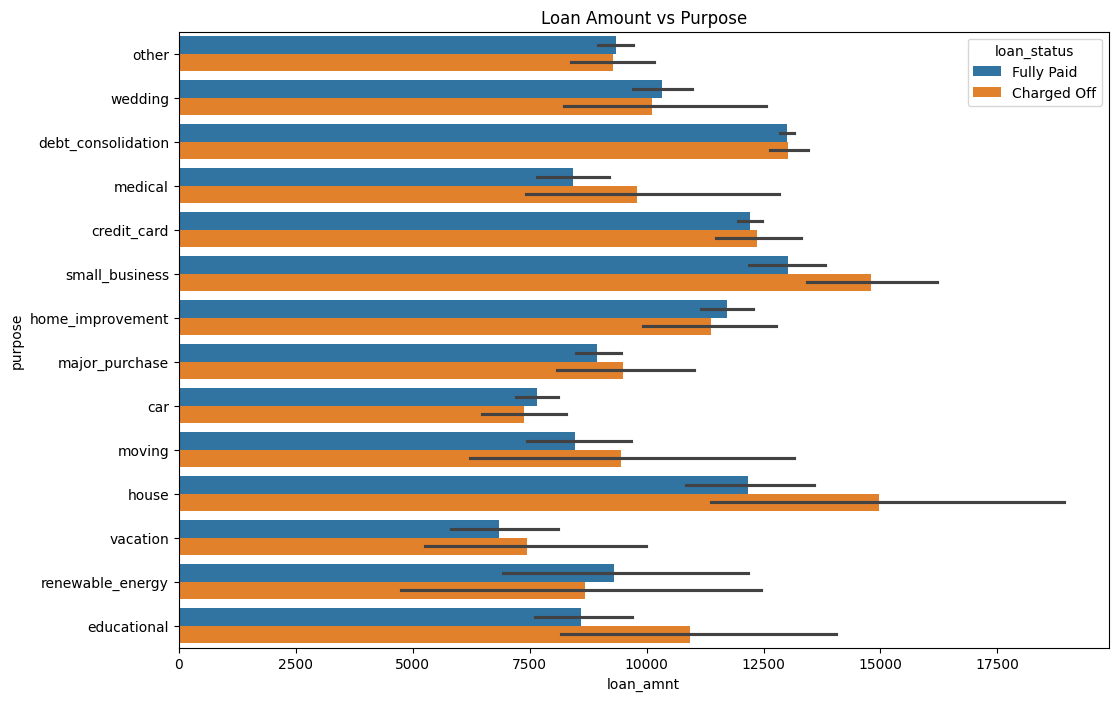

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x="loan_amnt", y="purpose", data=filtered_loan_df,hue="loan_status").set_title('Loan Amount vs Purpose')
plt.show()
#Purpose in debt_consolidation , small_buisness and house seemed to be more charged_off

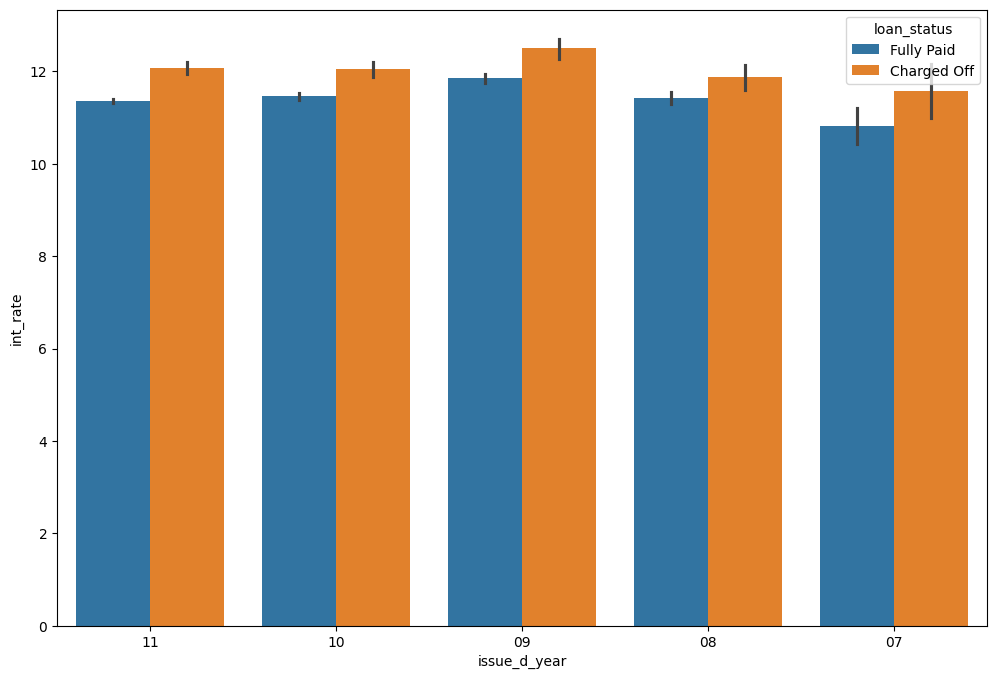

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x="issue_d_year", y="int_rate", data=filtered_loan_df,hue="loan_status")
plt.show()
#Any issued year , any interest rate all are charged off but mostlt in the year 2009

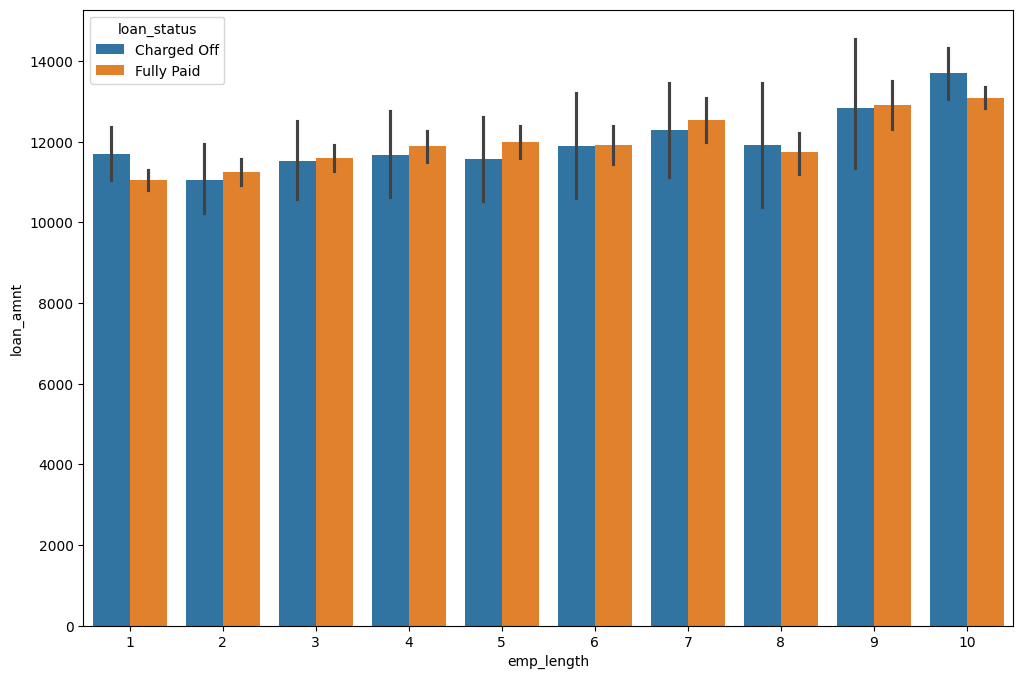

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(y="loan_amnt", x="emp_length", data=filtered_loan_df,hue="loan_status")
plt.show()
# Not a very consclusive analysis for loan status and emp_length with loan _amount .

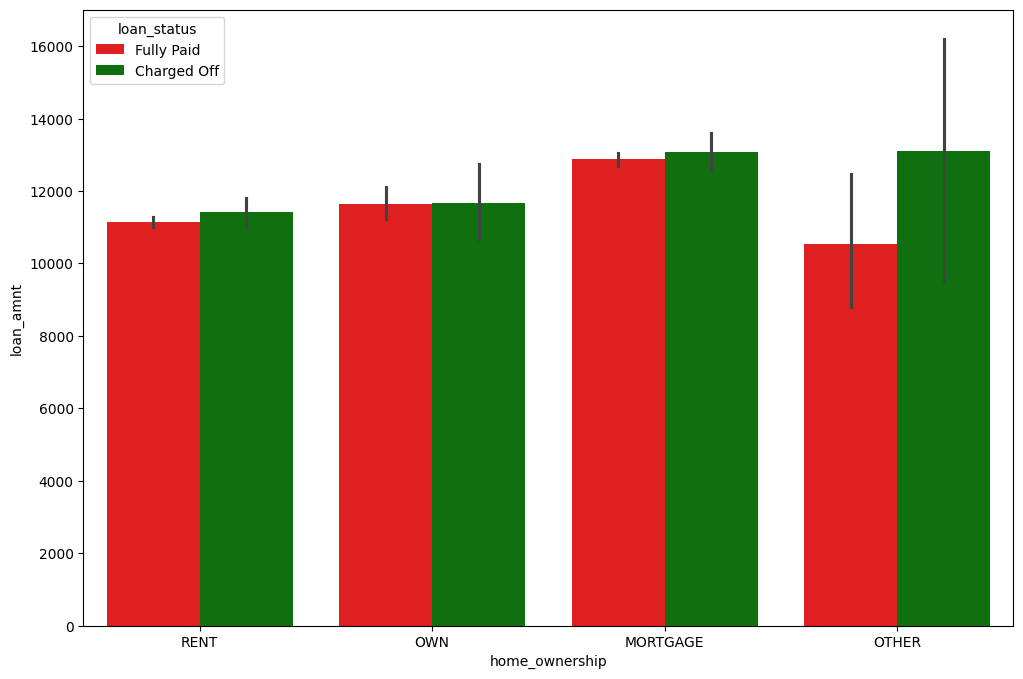

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(y="loan_amnt", x="home_ownership", data=filtered_loan_df,hue="loan_status",palette=['red','green'])
plt.show()
# In case of Other ownership we seem too see higher charged_off

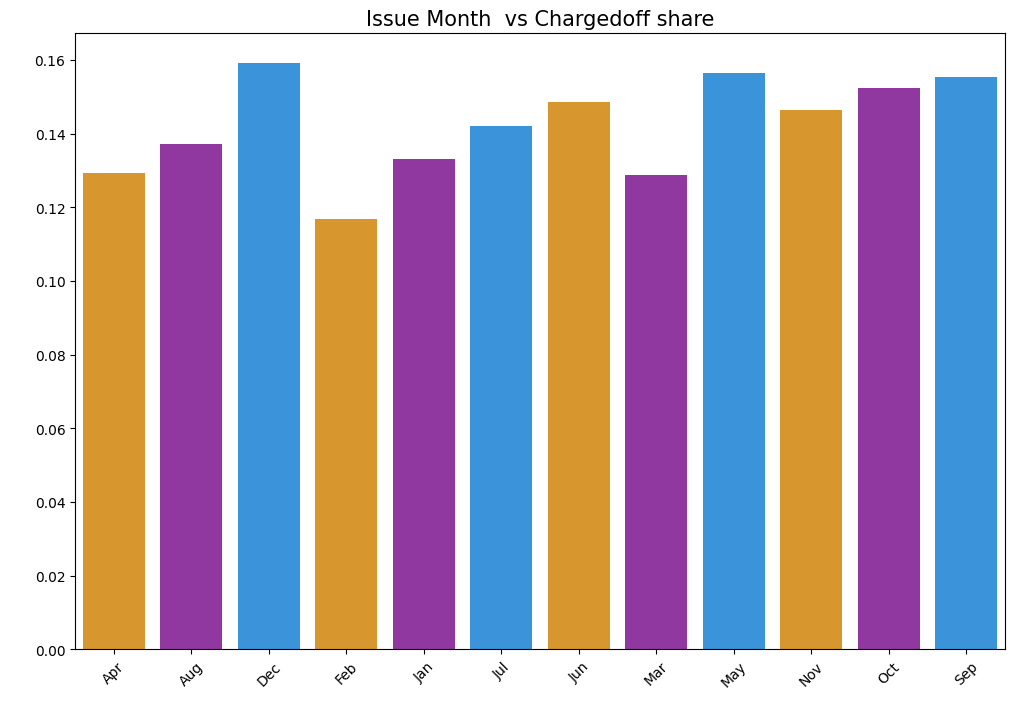

In [ ]:
# #Bivariate Analysis on Month of Issue of loan Record against Chargedoff_Proportion -

issue_month_vs_loan = loan_df.groupby(['issue_d_month', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_month_vs_loan['Total'] = issue_month_vs_loan['Charged Off']+ issue_month_vs_loan['Fully Paid']
issue_month_vs_loan['Chargedoff_share'] = issue_month_vs_loan['Charged Off'] / issue_month_vs_loan['Total']
issue_month_vs_loan.sort_values('Chargedoff_share', ascending=False)


# graph
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='w')
colors = ["#F39C12", "#9C27B0", "#2196F3"]
ax1.set_title('Issue Month  vs Chargedoff share',fontsize=15)
ax1=sns.barplot(x='issue_d_month', y='Chargedoff_share', data=issue_month_vs_loan,palette=colors)
ax1.set_xlabel('Issue Month' ,fontsize=14,color='w')
ax1.set_ylabel('Chargedoff share',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()


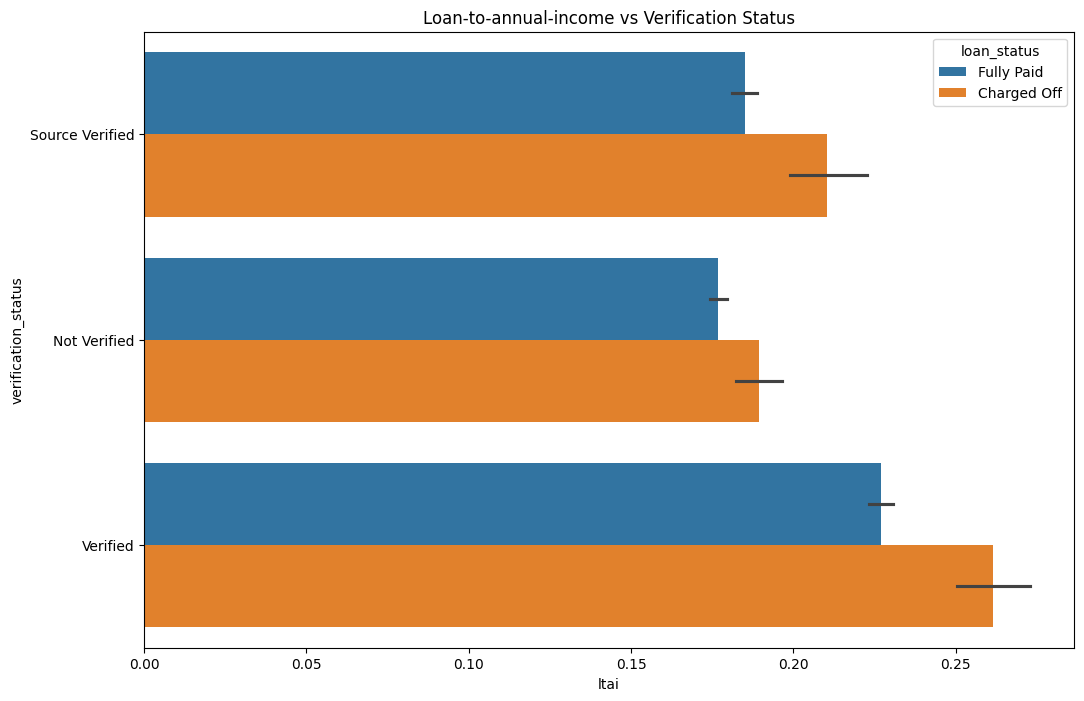

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x="ltai", y="verification_status", data=filtered_loan_df,hue="loan_status").set_title('Loan-to-annual-income vs Verification Status')
plt.show()
# This is an interesting insight - despite the income was verified by lending club or at source, the Default cases are more if the loan-to-annual-income ratio is high.

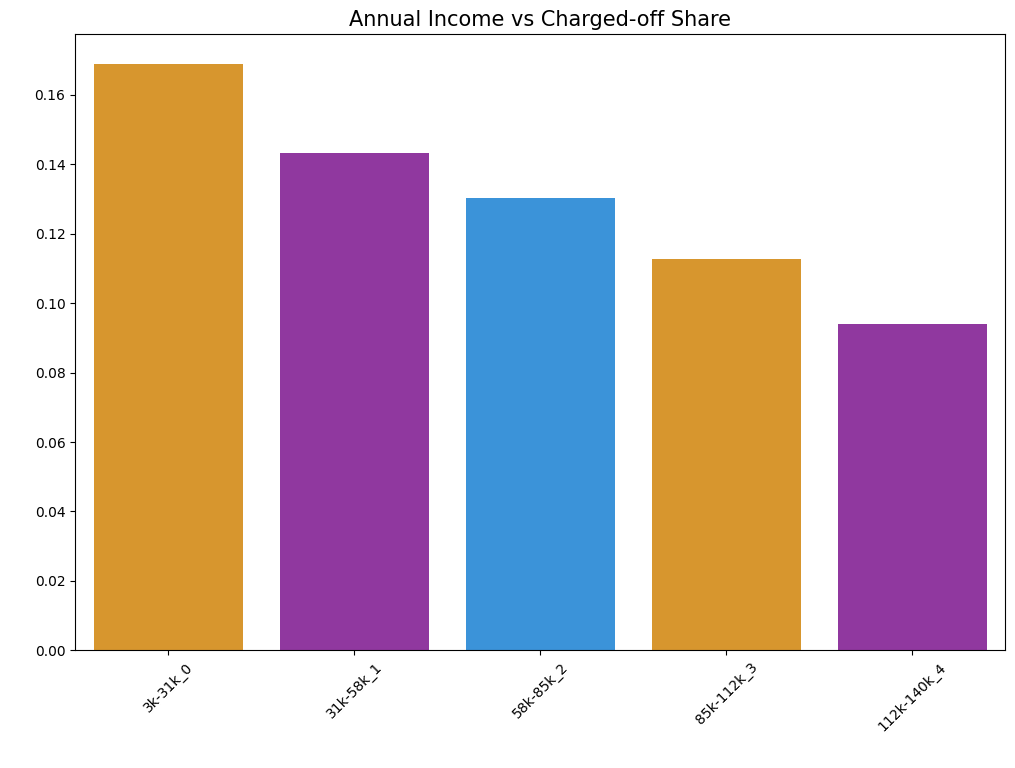

In [ ]:
# Group by annual_inc and loan_status and calculat echarged_off share
annual_inc_vs_loan = filtered_loan_df.groupby(['annual_inc_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
annual_inc_vs_loan['Total'] = annual_inc_vs_loan['Charged Off'] + annual_inc_vs_loan['Fully Paid']
annual_inc_vs_loan['Chargedoff_share'] = annual_inc_vs_loan['Charged Off'] / annual_inc_vs_loan['Total']
annual_inc_vs_loan = annual_inc_vs_loan.sort_values('Chargedoff_share', ascending=False)

fig, ax1 = plt.subplots(figsize=(12, 8), facecolor='w')
colors = ["#F39C12", "#9C27B0", "#2196F3"]
ax1.set_title('Annual Income vs Charged-off Share', fontsize=15)
ax1 = sns.barplot(x='annual_inc_b', y='Chargedoff_share', data=annual_inc_vs_loan, palette=colors)
ax1.set_xlabel('Annual Income', fontsize=14, color='w')
ax1.set_ylabel('Charged-off Share', fontsize=14, color='w')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# prompt: Explain me above heat map

# The heatmap shows the relationship between the home ownership and purpose of the loan.
# The color intensity indicates the proportion of loans that were charged off (0) or fully paid (1).
# For example, the cell in the top-left corner shows that 0.11 of the loans taken out by borrowers who own their homes and used the loan for debt consolidation were charged off.
# The cell in the bottom-right corner shows that 0.23 of the loans taken out by borrowers who rent their homes and used the loan for small business were charged off.
# This suggests that borrowers who rent their homes and use the loan for small business are more likely to default on their loans than borrowers who own their homes and use the loan for debt consolidation.


# **Correlation Analysis**

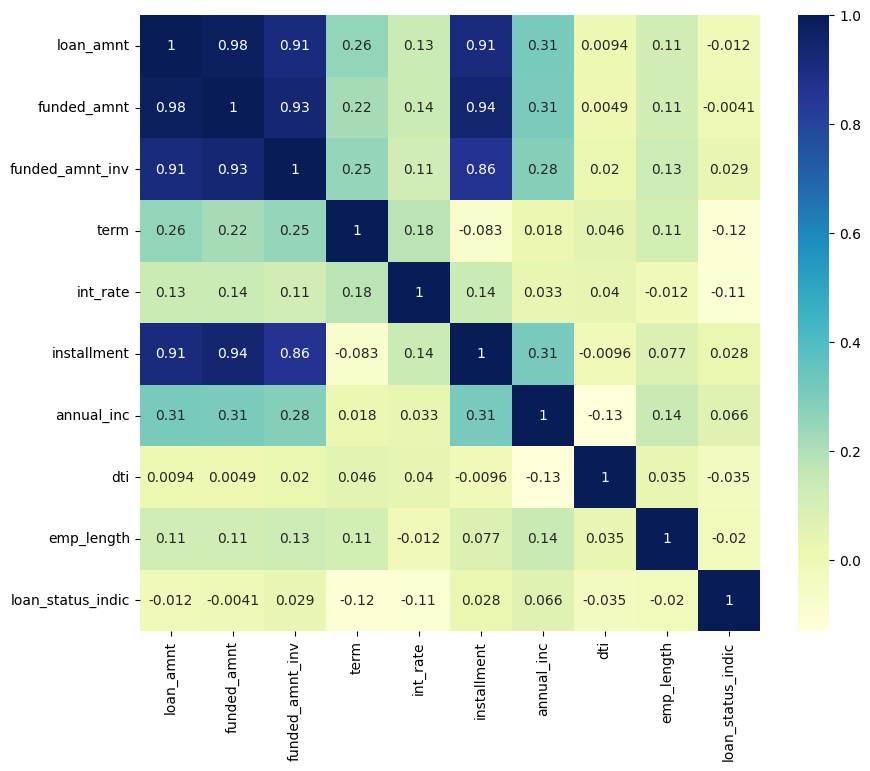

In [ ]:
bivariate_variables = univariate_variables
bivariate_variables.append('loan_status_indic')
loan_corr_matrix=filtered_loan_df[bivariate_variables].corr()
round(loan_corr_matrix,2)
#Plotting Heat map to understand correlation visually
plt.figure(figsize=(10,8))
sns.heatmap(data=loan_corr_matrix, cmap="YlGnBu",
                annot=True)

# displaying the plotted heatmap
plt.show()

<Figure size 1500x1500 with 0 Axes>

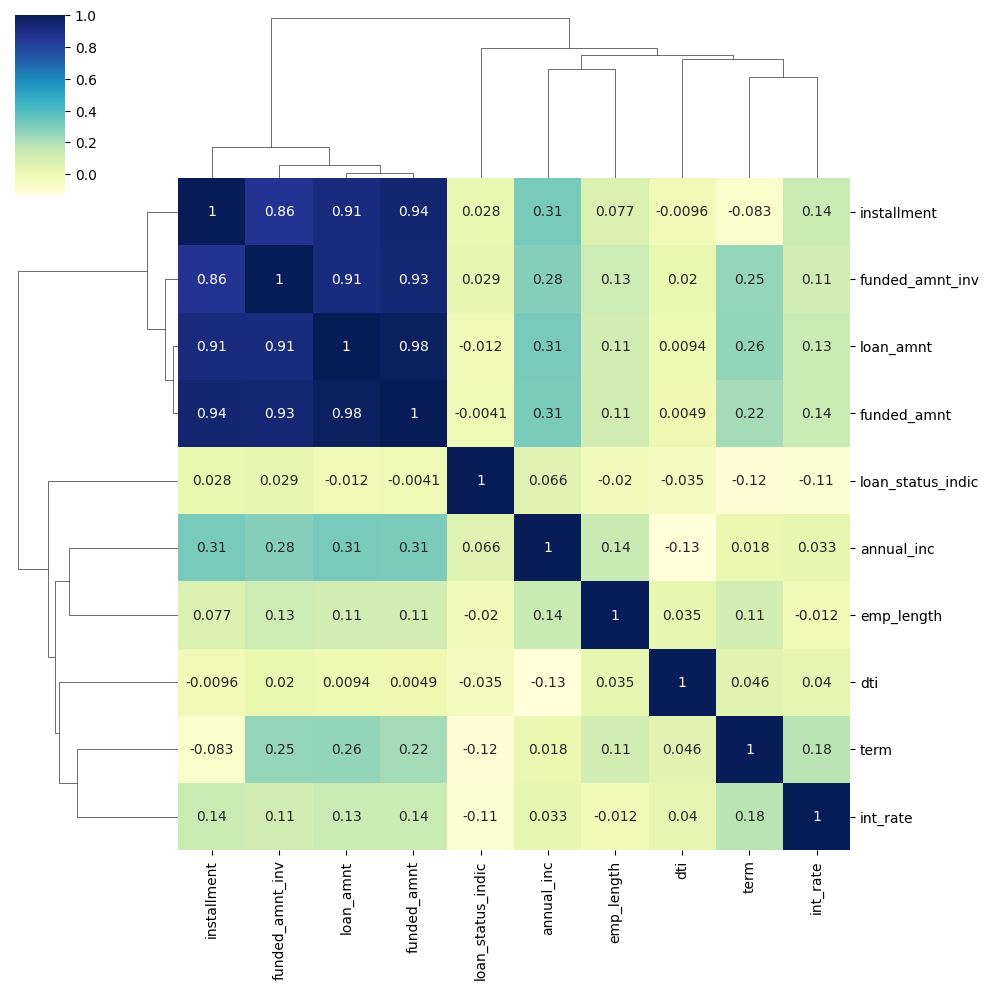

'\n# Observations:\n\n# Cluster 1:\n- High correlation between loan_amnt, funded_amnt, funded_amnt_inv, and installment.\n- These features are all related to the amount of money borrowed and the amount of money paid back.\n\n# Cluster 2:\n- High correlation between int_rate and dti.\n- These features are both related to the risk of default.\n\n# Cluster 3:\n- High correlation between annual_inc and loan_status_indic.\n- This indicates that borrowers with higher annual incomes are more likely to repay their loans.\n\n# Cluster 4:\n- High correlation between emp_length and loan_status_indic.\n- This indicates that borrowers with longer employment histories are more likely to repay their loans.\n'

In [ ]:
# Generate a cluster map for the heatmap
plt.figure(figsize=(15, 15))
sns.clustermap(data=loan_corr_matrix, cmap="YlGnBu", annot=True)
plt.show()
"""
# Observations:

# Cluster 1:
- High correlation between loan_amnt, funded_amnt, funded_amnt_inv, and installment.
- These features are all related to the amount of money borrowed and the amount of money paid back.

# Cluster 2:
- High correlation between int_rate and dti.
- These features are both related to the risk of default.

# Cluster 3:
- High correlation between annual_inc and loan_status_indic.
- This indicates that borrowers with higher annual incomes are more likely to repay their loans.

# Cluster 4:
- High correlation between emp_length and loan_status_indic.
- This indicates that borrowers with longer employment histories are more likely to repay their loans.
"""



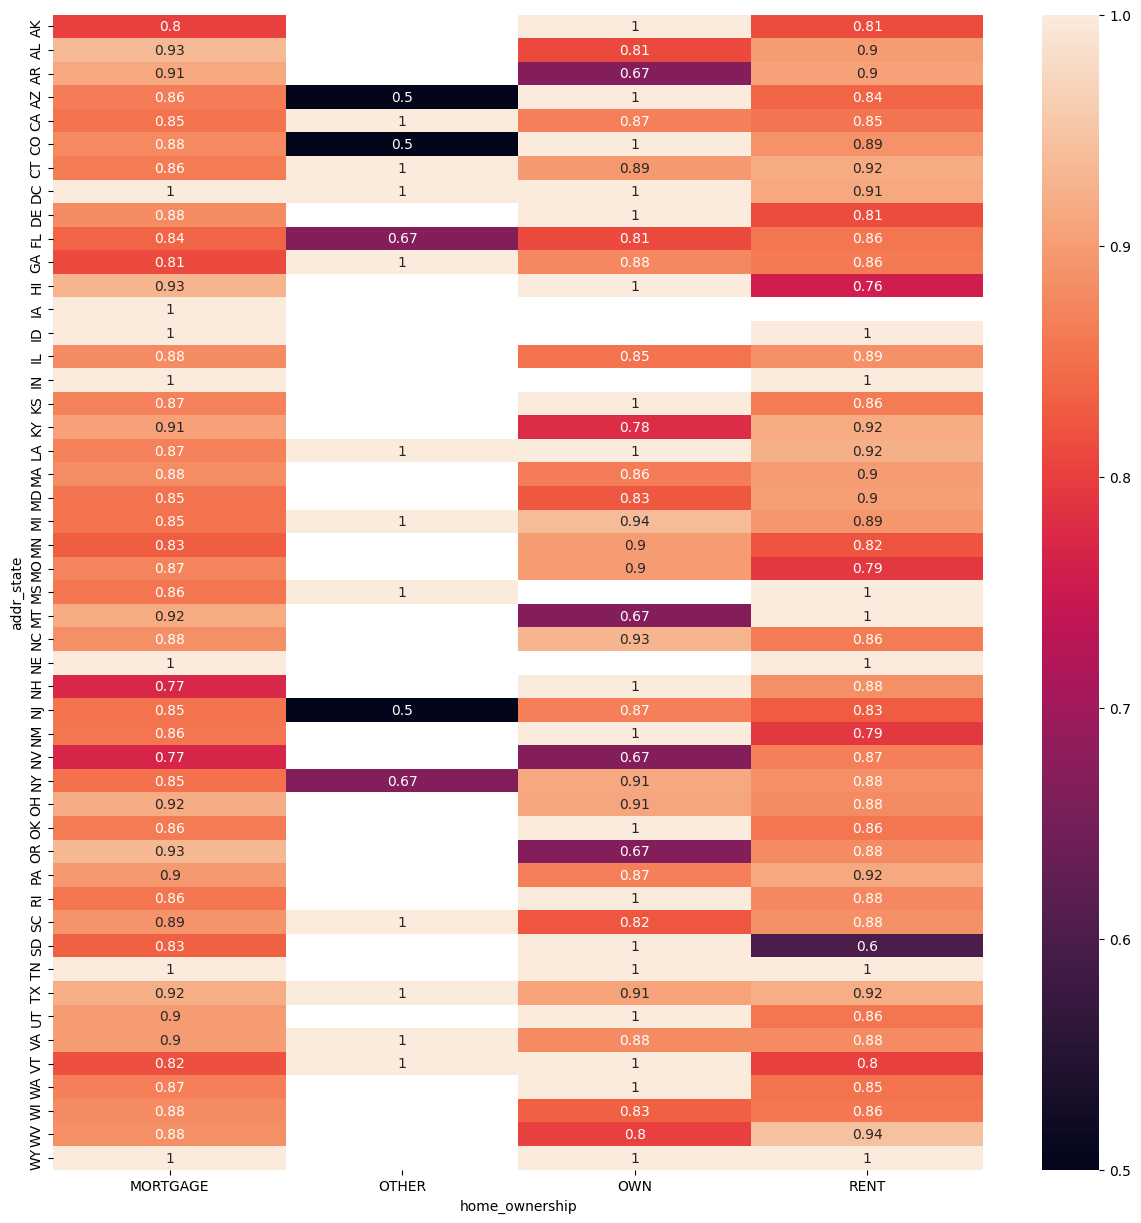

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(filtered_loan_df.pivot_table(index='addr_state',columns='home_ownership',values='loan_status_indic'),annot=True)
plt.show()
# Loan from "CA" ,"MI",'LA','TN'seems to be Fully paid irrespective of Home ownership.
#There might be a correlation between home ownership status, state of residence, and loan repayment behavior. Further analysis and investigation would be needed to determine the underlying factors contributing to these patterns.
